# Bayesian Learning
![NB](images/06_bayes.jpg)

![Bayesians](images/frequentists_vs_bayesians_2x.png)

Note, we'll use another library in this notebook: [GPy](http://sheffieldml.github.io/GPy/)

Installation:
```
pip install GPy
pip install pods
```

In [3]:
# Global imports and settings
from preamble import *
%matplotlib inline
plt.rcParams['savefig.dpi'] = 300 # Use 300 for PDF, 100 for slides
#InteractiveShell.ast_node_interactivity = "all"
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

In [4]:
import GPy
import pods

## Naive Bayes
Predict the probability that a point belongs to each class, using Bayes' Theorem, assuming that the features are independent from each other.

Very fast: only needs to extract statistics from each feature.

### Naive Bayes Classifier
A Naive Bayes classifier learns the joint probability $P(x,c) = P(x|c)P(c)$ of the data, and predicts the class of each sample using Bayes' rule:

![Bayes Rule](images/06_bayes_rule.png)

$P(c|x)$ is the posterior probability of class (target) given predictor (attribute).  
$P(c)$ is the _prior_ probability of class: what you believed before you saw the evidence $x$  
$P(x|c)$ is the _likelihood_ of seeing that evidence if your class is correct  
$P(x)$ is the prior probability of predictor (_marginal likelihood_): the likelihood of the evidence $x$ under any circumstance

_Naive_ Bayes assumes that all features are conditionally independent from each other, in which case:  
$P(\mathbf{x}|c) = P(x_1|c) \times P(x_2|c) \times ... \times P(x_n|c)$

_Bayesian Networks_ are another family of algorithms in which the conditional dependencies between features is modelled explictly. We can't discuss them right now, though.

Since Bayesian models model the entire joint distribution, they can generate new (likely) points: _generative model_

Example. True or not? Players will play if weather is sunny.

![nb example](images/06_bayes_example.png)

Compute the posterior for every class and predict the class with highest probability

### On numeric data
GaussianNB:

* Computes mean $\mu_c$ and standard deviation $\sigma_c$ of the feature values per class 
* It then fits a Gaussian distribution around the mean

$p(x=v \mid c)=\frac{1}{\sqrt{2\pi\sigma^2_c}}\,e^{ -\frac{(v-\mu_c)^2}{2\sigma^2_c} }$

* Prediction are made using Bayes' theorem, by computing the joint probability given all features

$p(c \mid \mathbf{x}) = \frac{p(c) \ p(\mathbf{x} \mid c)}{p(\mathbf{x})}$



![Naive Bayes image](images/06_nb.png)

Visualizing Naive Bayes

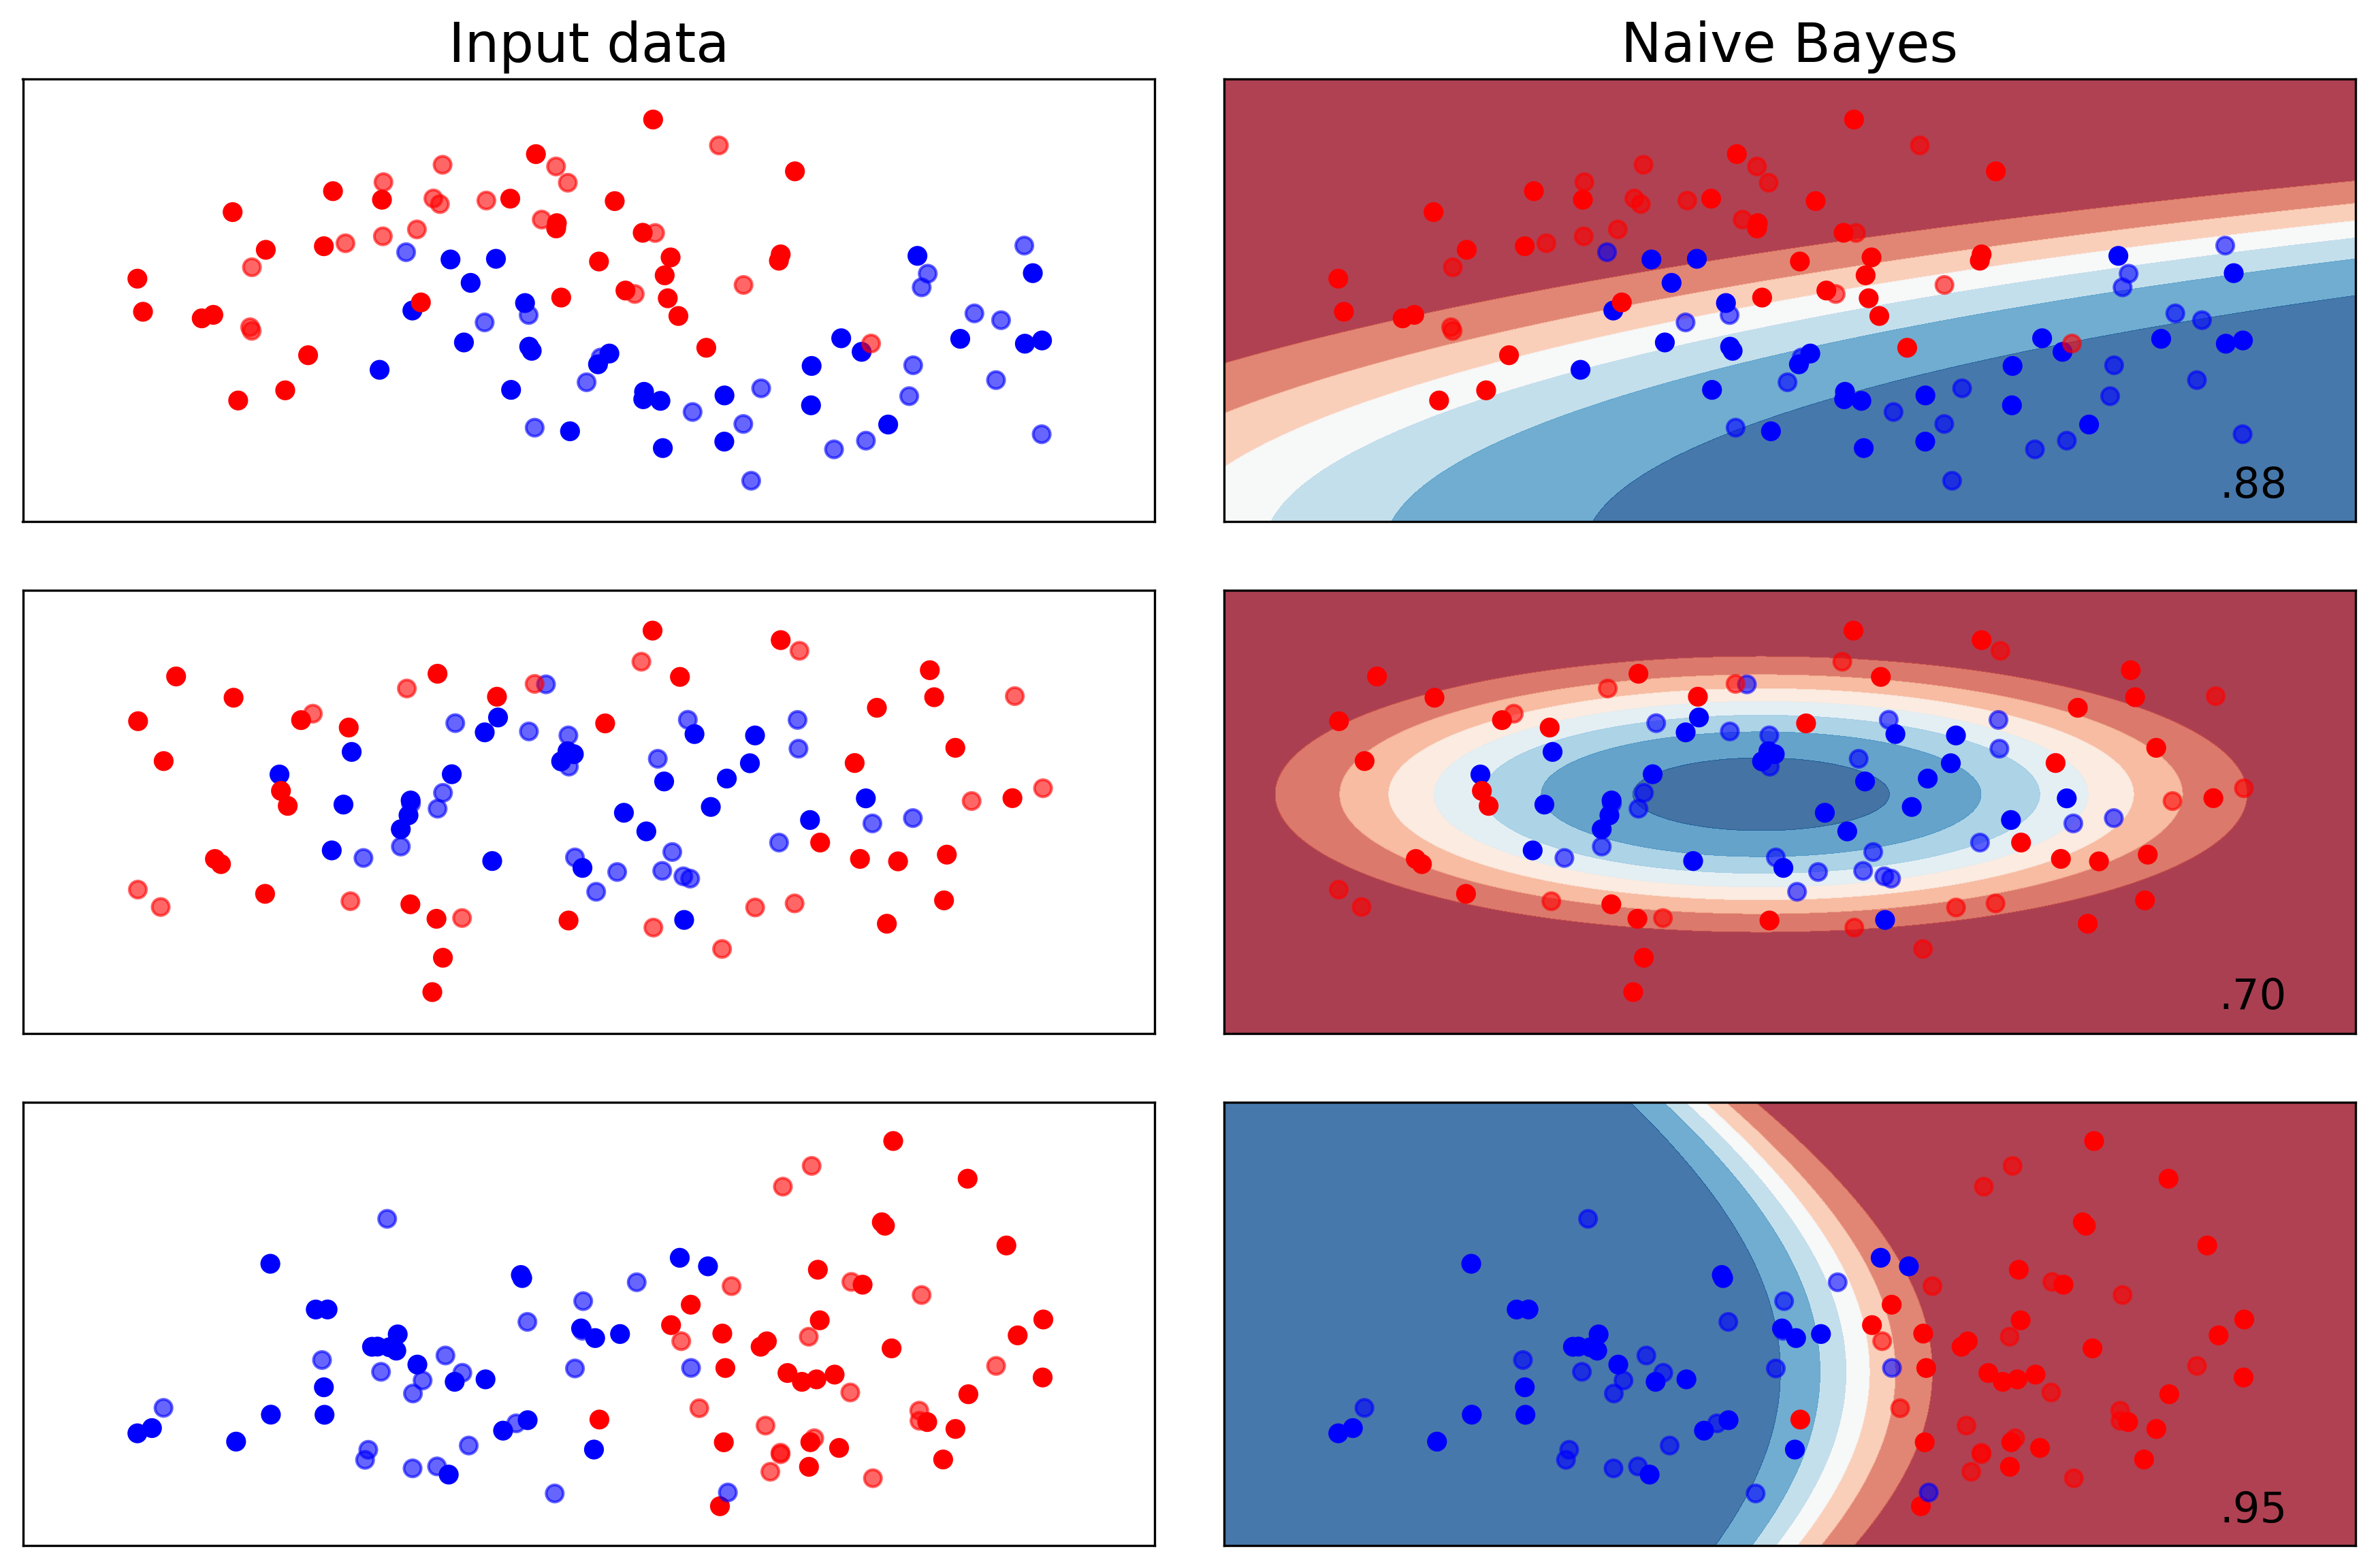

In [5]:
from sklearn.naive_bayes import GaussianNB
import plot_classifiers as pc

names = ["Naive Bayes"]
classifiers = [GaussianNB()]

plt.rcParams.update({'font.size': 16})
pc.plot_classifiers(names, classifiers, figuresize=(12,8))

Other Naive Bayes classifiers:
    
* BernoulliNB
    * Assumes binary data
    * Feature statistics: Number of non-zero entries per class
* MultinomialNB
    * Assumes count data
    * Feature statistics: Average value per class

Mostly used for text classification (bag-of-words data)

### Probabilistic interpretation of regression
Let's look at a the following regression problem

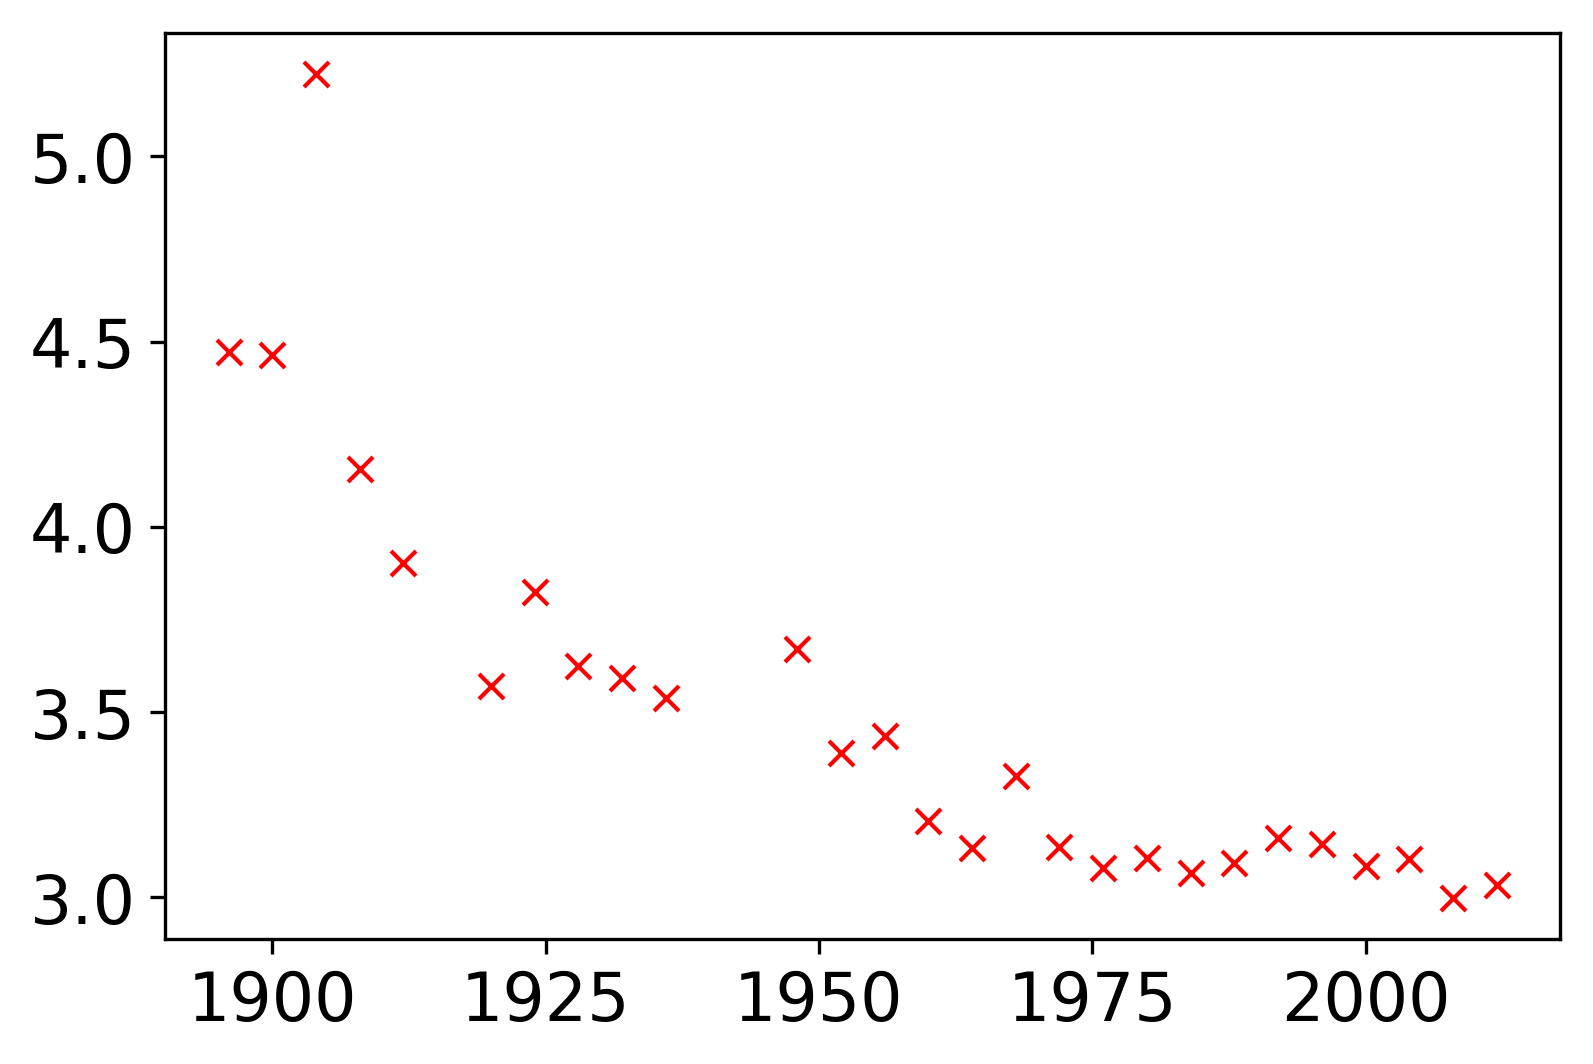

In [35]:
data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']
plt.plot(x, y, 'rx')

Let's first try to fit a linear model 

$$y = f(\mathbf{x}_i) = \mathbf{x}_i^\top\mathbf{w}$$

We can solve this via linear algebra by making a design matrix of the data, which includes the  $x_0=1$ column, to represent the bias. Hence, each vector $\mathbf{x}_i$ is given by appending a 1 onto the original vector

$$\mathbf{x}_i = 
\begin{bmatrix} 
1 \\\
x_i
\end{bmatrix}$$

We can do this for the entire data set to form a design matrix $\mathbf{X}$,

$$\mathbf{X} = \begin{bmatrix} 
\mathbf{x}_1^\top \\\ 
\mathbf{x}_2^\top \\\ 
\vdots \\\
\mathbf{x}_N^\top
\end{bmatrix} = \begin{bmatrix}
1 & x_1 \\\
1 & x_2 \\\
\vdots & \vdots \\\
1 & x_N 
\end{bmatrix},$$

which in `numpy` is done and solved with the following commands:

In [42]:
X = np.hstack((np.ones_like(x), x)) # [ones(size(x)) x]
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))

print("X: ",X[:5])
print("xTx: ",np.dot(X.T, X))
print("xTy: ",np.dot(X.T, y))
print("w:", w) 

X:  [[   1. 1896.]
 [   1. 1900.]
 [   1. 1904.]
 [   1. 1908.]
 [   1. 1912.]]
xTx:  [[2.700e+01 5.282e+04]
 [5.282e+04 1.034e+08]]
xTy:  [[    94.534]
 [184493.814]]
w: [[28.895]
 [-0.013]]


With $w = [c, m]$, we can now fit the function

$$ y= mx +c $$

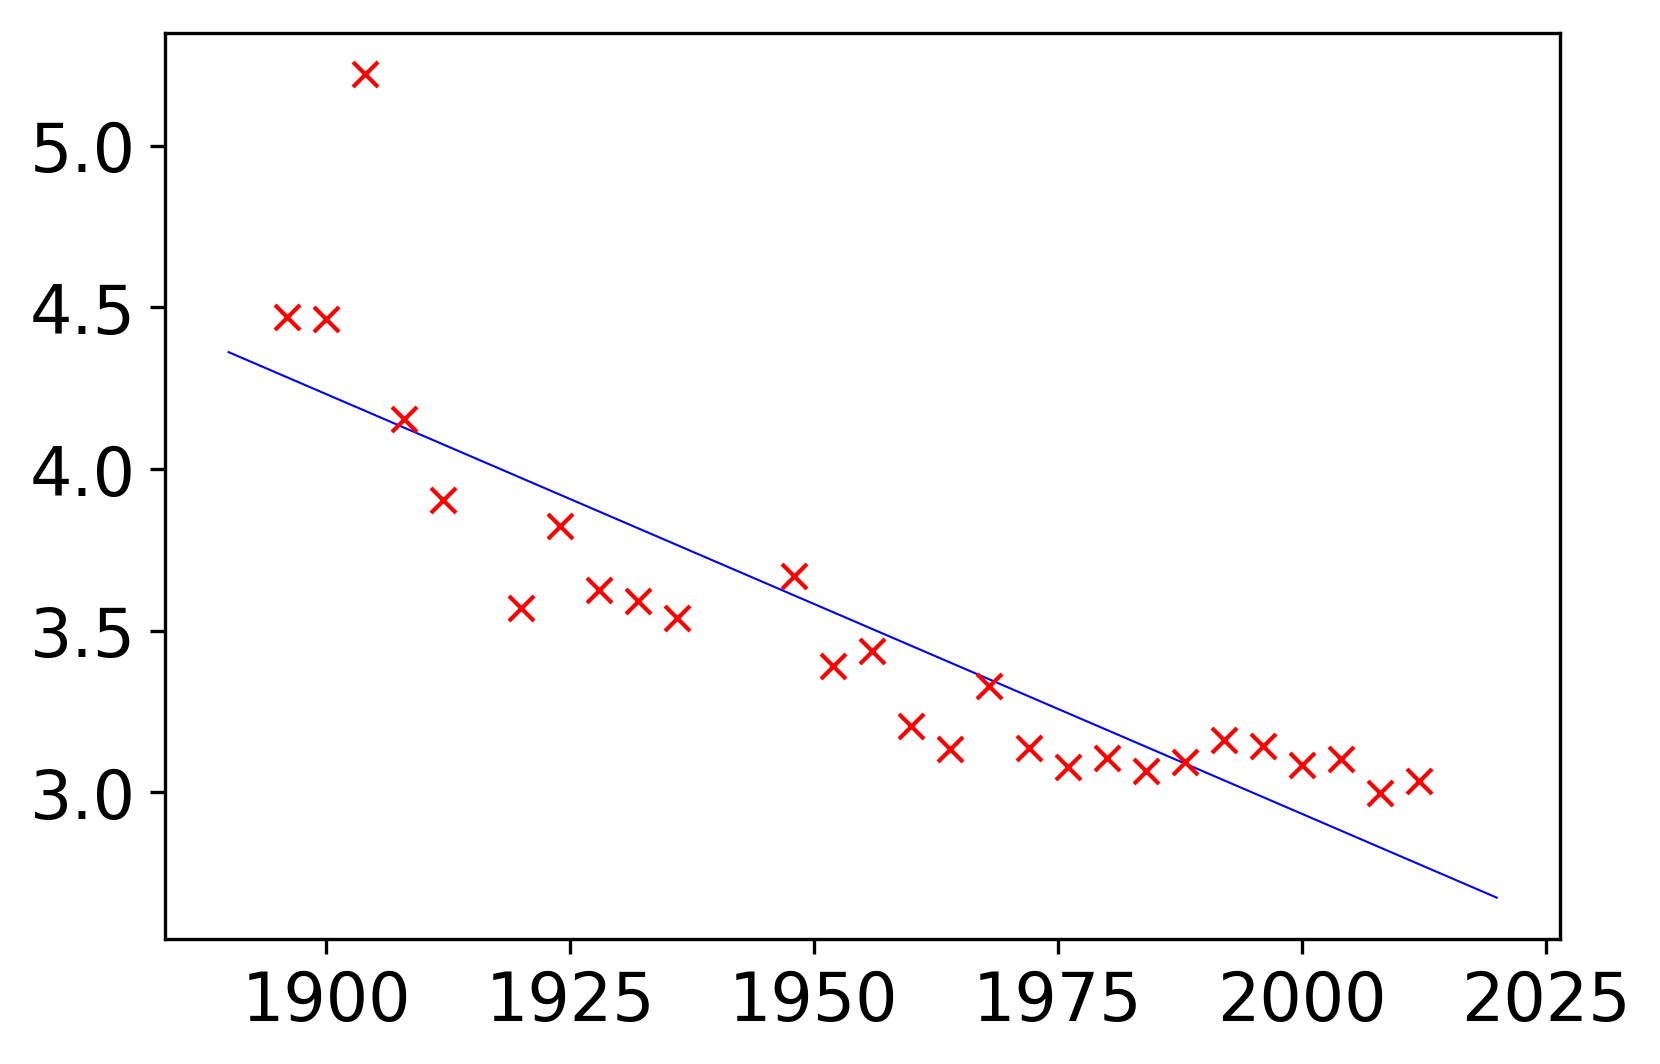

In [8]:
m = w[1]; c=w[0]
x_test = np.linspace(1890, 2020, 130)[:, None]

f_test = m*x_test + c

plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

Now we will fit a quadratic model using more _basis functions_.  
Firstly, we need to create a new design matrix that contains the quadratic basis, 

$$\mathbf{\Phi} = \left[ \mathbf{1} \quad \mathbf{x} \quad \mathbf{x}^2\right]$$

[[643.642]
 [ -0.643]
 [  0.   ]]


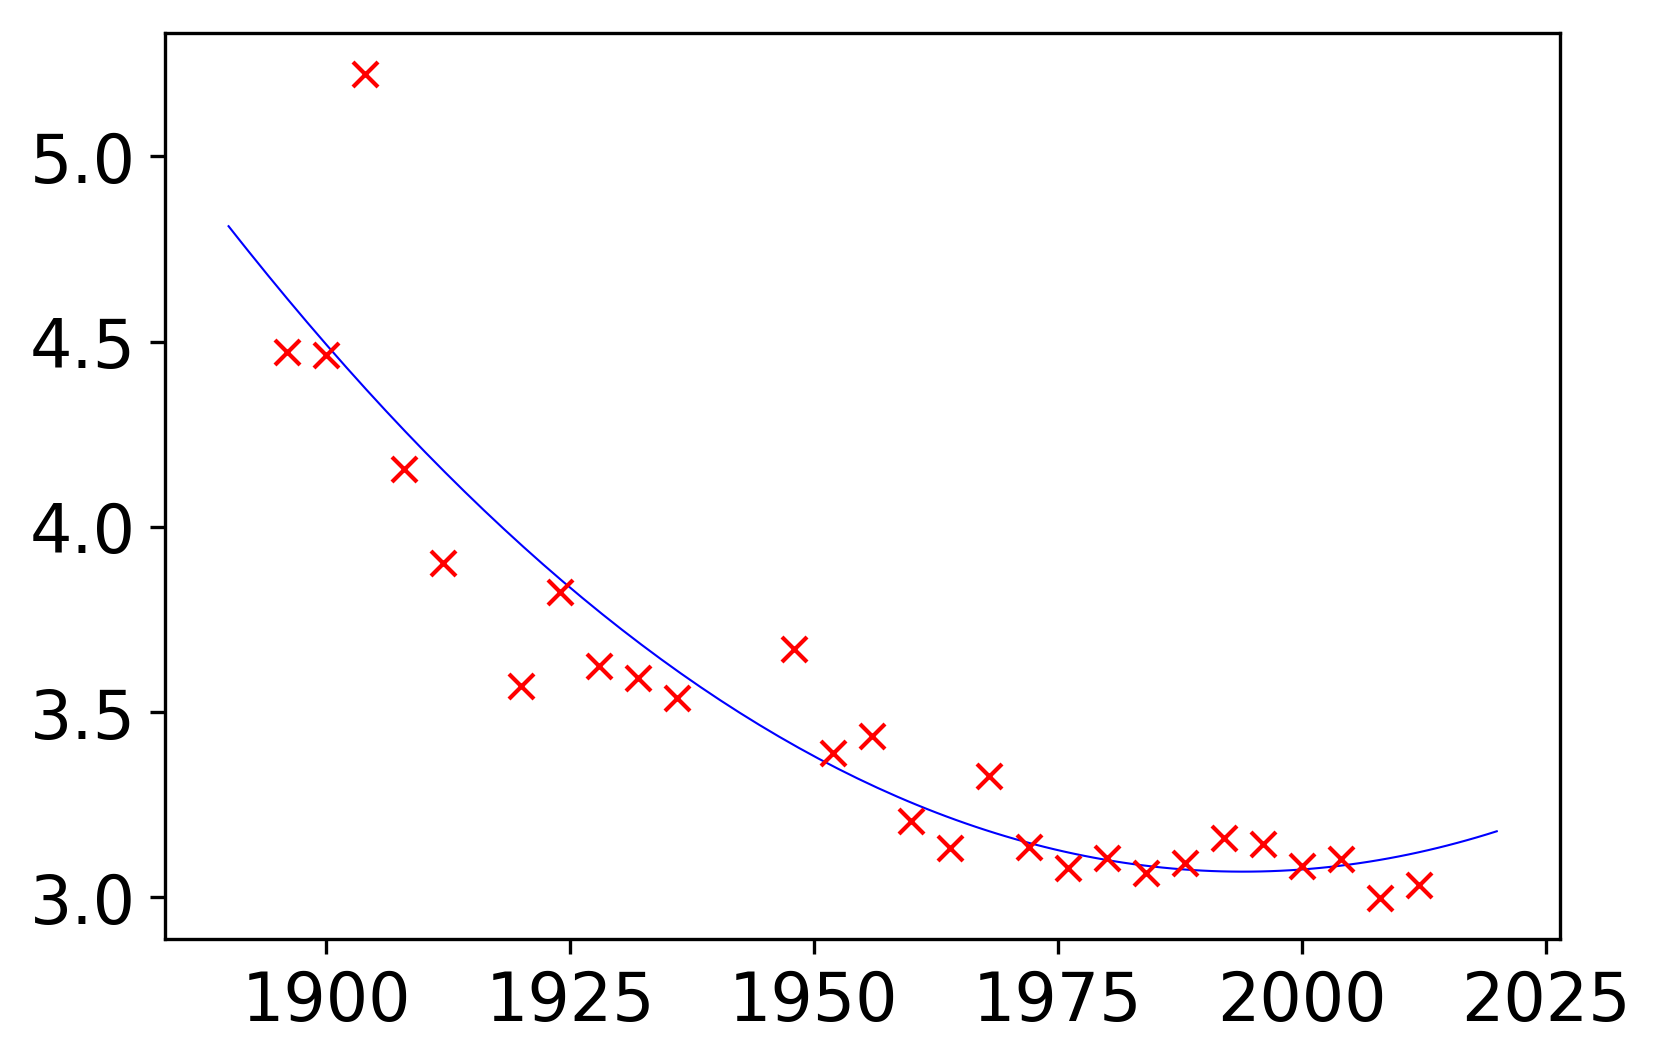

In [9]:
Phi = np.hstack([np.ones(x.shape), x, x**2])
w = np.linalg.solve(np.dot(Phi.T, Phi), np.dot(Phi.T, y))
print(w)
f_test = w[2]*x_test**2 + w[1]*x_test + w[0]
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

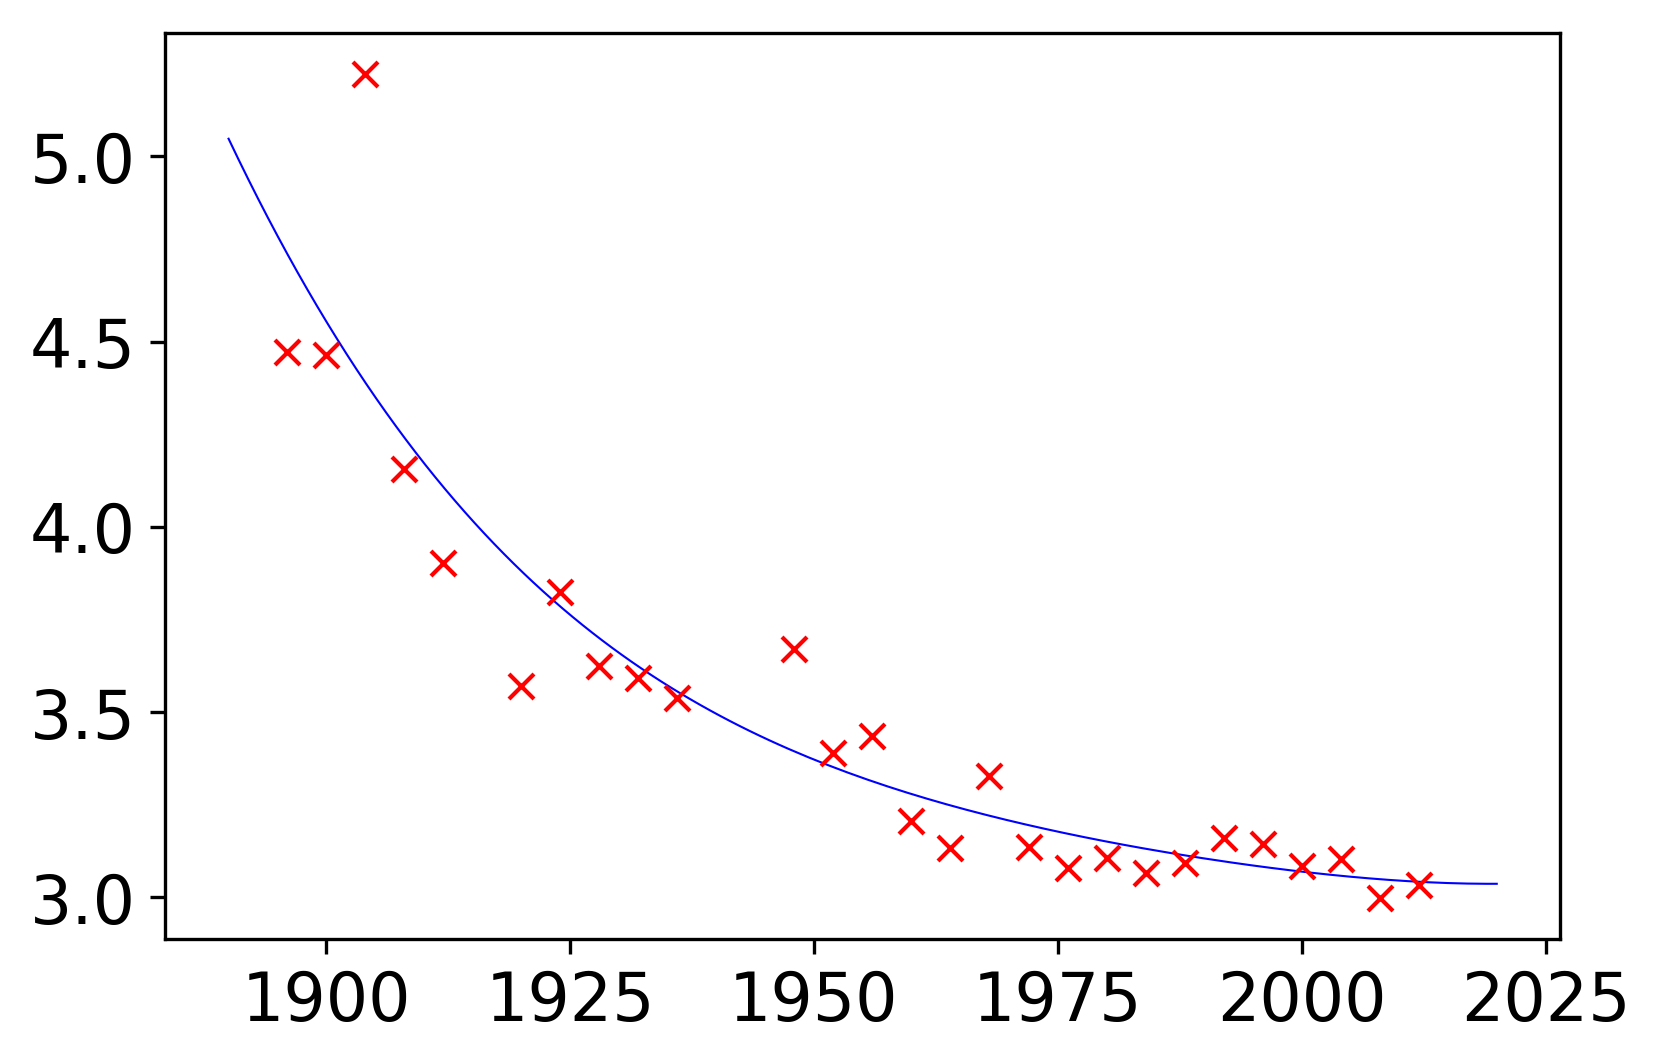

In [10]:
Phi = np.hstack([np.ones(x.shape), x, x**2, x**3, x**4, x**5, x**6])
w = np.linalg.solve(np.dot(Phi.T, Phi), np.dot(Phi.T, y))
f_test = w[6]*x_test**6 + w[5]*x_test**5 + w[4]*x_test**4 + w[3]*x_test**3 + w[2]*x_test**2 + w[1]*x_test + w[0]
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

## Gaussian processes

Processes where the probabilities of possible base functions are learned/updated based on new data.

![gps](images/06_gps.png)

## Probabilistic interpretation or regression

When there are more observations than unknowns (overdetermined systems), we cannot perfectly fit
$$ y = mx + c $$

This issue can be solved by assuming that the data in inherently uncertain, and model it explictly by introducing a type of [slack variable](http://en.wikipedia.org/wiki/Slack_variable), $\epsilon_i$, known as noise.

For each observation we now have the equation

$$y_i = mx_i + c + \epsilon_i.$$

The slack variable represented the difference between our actual prediction and the true observation. This is also known as the *residual*. 

We now have an additional $n$ variables to estimate, one for each data point, $\{\epsilon_i\}$. With the original $m$ and $c$ we now have $n+2$ parameters to be estimated from $n$ observations (underdetermined system).

We can however make assumptions about the noise distribution, i.e. that the slack variables are distributed according to a probability density. One often assumes Gaussian noise:

$$\epsilon_i \sim \mathcal{N}(0, \sigma^2),$$

with zero mean and variance $\sigma^2$.


In the Bayesian approach, we also assume a _prior distribution_ for the parameters, $\mathbf{w}$:

$$\mathbf{w} \sim \mathcal{N}(\mathbf{0}, \alpha \mathbf{I})$$

I.e, each element of the parameters vector, $w_i$, was drawn from a Gaussian density with variance $\alpha$
$$w_i \sim \mathcal{N}(0,\alpha)$$

Gaussian process model parameters:

- parameters of the prior
- parameters of the basis functions 
- noise level

In [11]:
# set prior variance on w
alpha = 4.
# set the order of the polynomial basis set
degree = 5
# set the noise variance
sigma2 = 0.01

Now we have the variance, we can sample from the prior distribution to see what form we are imposing on the functions *a priori*. 

In [48]:
# Build the basis matrices (on Olypics data)
def polynomial(x, degree, loc, scale):
    degrees = np.arange(degree+1)
    return ((x-loc)/scale)**degrees
 
scale = np.max(x) - np.min(x)
loc = np.min(x) + 0.5*scale

num_data = x.shape[0]
num_pred_data = 100 # how many points to use for plotting predictions
x_pred = np.linspace(1880, 2030, num_pred_data)[:, None] # input locations for predictions
Phi_pred = polynomial(x_pred, degree=degree, loc=loc, scale=scale)
Phi = polynomial(x, degree=degree, loc=loc, scale=scale)
Phi_pred 

array([[ 1.   , -0.638,  0.407, -0.26 ,  0.166, -0.106],
       [ 1.   , -0.625,  0.39 , -0.244,  0.152, -0.095],
       [ 1.   , -0.612,  0.374, -0.229,  0.14 , -0.086],
       [ 1.   , -0.599,  0.358, -0.215,  0.129, -0.077],
       [ 1.   , -0.586,  0.343, -0.201,  0.118, -0.069],
       [ 1.   , -0.573,  0.328, -0.188,  0.108, -0.062],
       [ 1.   , -0.56 ,  0.313, -0.175,  0.098, -0.055],
       [ 1.   , -0.546,  0.299, -0.163,  0.089, -0.049],
       [ 1.   , -0.533,  0.285, -0.152,  0.081, -0.043],
       [ 1.   , -0.52 ,  0.271, -0.141,  0.073, -0.038],
       [ 1.   , -0.507,  0.257, -0.131,  0.066, -0.034],
       [ 1.   , -0.494,  0.244, -0.121,  0.06 , -0.029],
       [ 1.   , -0.481,  0.232, -0.111,  0.054, -0.026],
       [ 1.   , -0.468,  0.219, -0.103,  0.048, -0.022],
       [ 1.   , -0.455,  0.207, -0.094,  0.043, -0.02 ],
       [ 1.   , -0.442,  0.195, -0.086,  0.038, -0.017],
       [ 1.   , -0.429,  0.184, -0.079,  0.034, -0.015],
       [ 1.   , -0.416,  0.173,

### Weight Space View

To generate typical functional predictions from the model, we need a set of model parameters.  
We assume that the parameters are drawn independently from a Gaussian density,
$$
\mathbf{w} \sim \mathcal{N}(\mathbf{0}, \alpha\mathbf{I}),
$$
then we can combine this with the definition of our prediction function $f(\mathbf{x})$,
$$
f(\mathbf{x}) = \mathbf{w}^\top \boldsymbol{\phi}(\mathbf{x}).
$$
We can now sample from the prior density to obtain a vector $\mathbf{w}$ using the function `np.random.normal` and combine these parameters with our basis to create some samples of what $f(\mathbf{x})$ looks like,

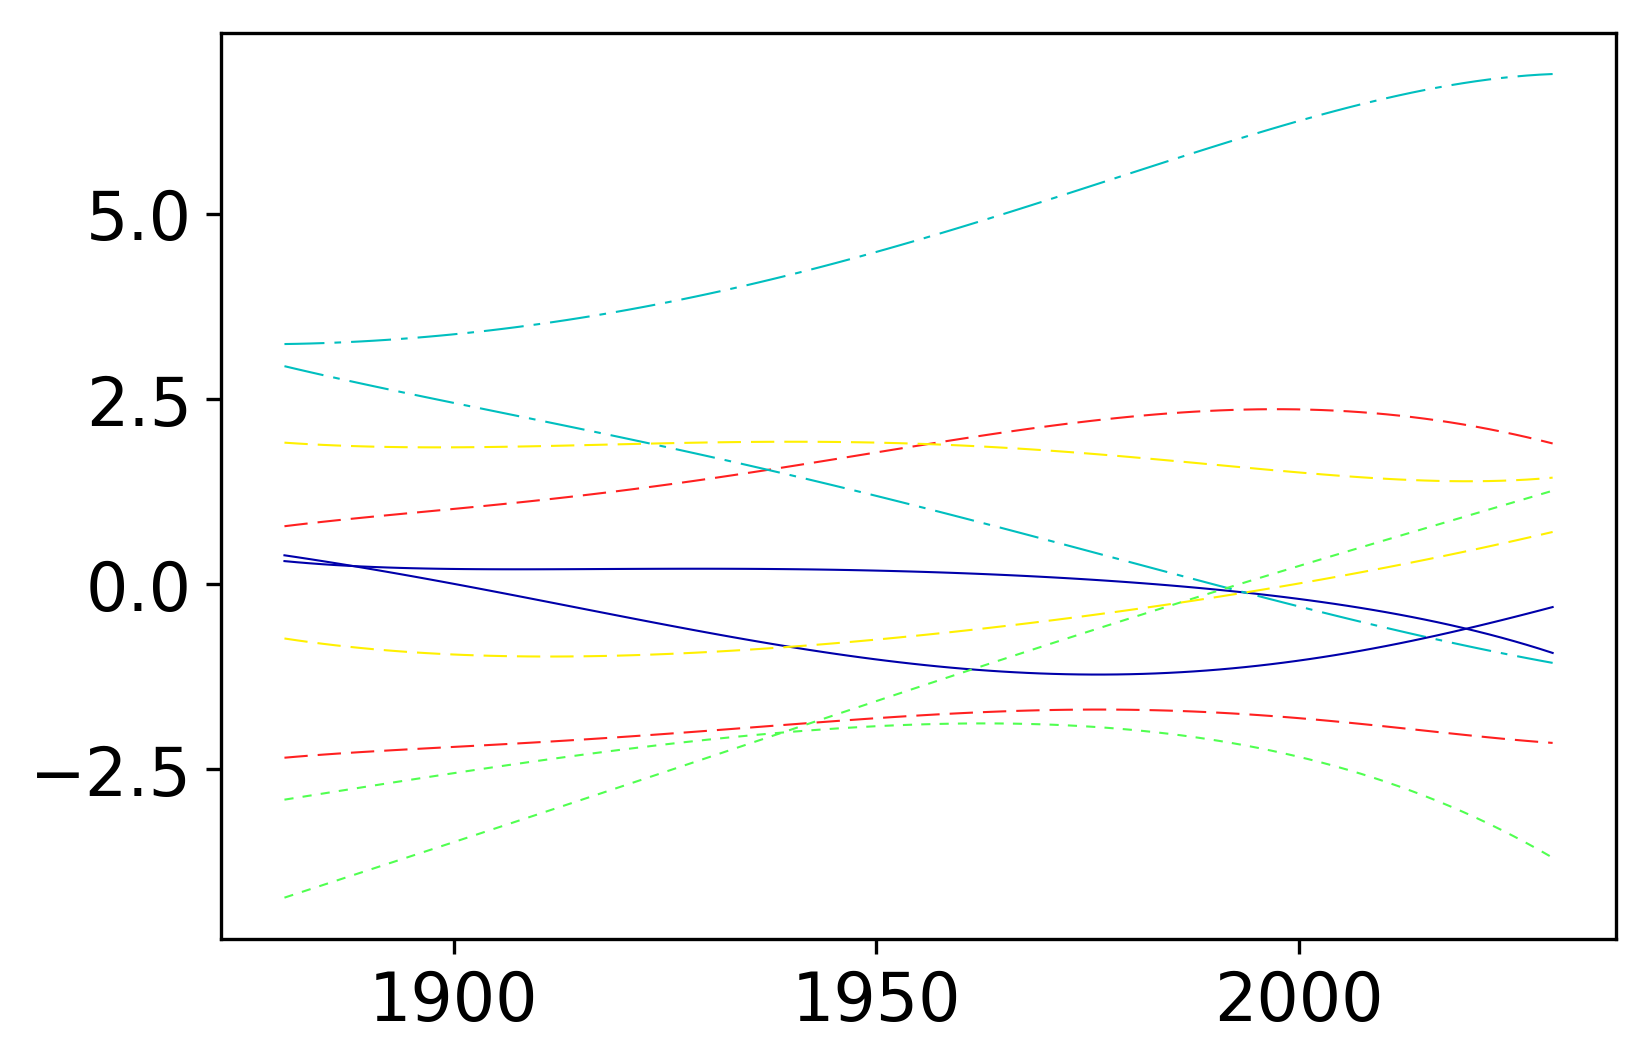

In [50]:
num_samples = 10
K = degree+1
for i in range(num_samples):
    z_vec = np.random.normal(size=(K, 1))
    w_sample = z_vec*np.sqrt(alpha)
    f_sample = np.dot(Phi_pred,w_sample)
    plt.plot(x_pred, f_sample) 

### Function space view

We can use standard properties of multivariate Gaussians to write down the probability density that is implied over $\mathbf{f}$. 

We know that if $\mathbf{w}$ is sampled from a multivariate Gaussian with covariance $\alpha \mathbf{I}$ and zero mean, then assuming that $\boldsymbol{\Phi}$ is a deterministic matrix (i.e. it is not sampled from a probability density) then the vector $\mathbf{f}$ will also be distributed according to a zero mean multivariate normal as follows,
$$
\mathbf{f} \sim \mathcal{N}(\mathbf{0},\alpha \boldsymbol{\Phi} \boldsymbol{\Phi}^\top).
$$

What happens if we sample $\mathbf{f}$ directly from this density, rather than first sampling $\mathbf{w}$ and then multiplying by $\boldsymbol{\Phi}$. 

Let's try this. First of all we define the covariance (joined variability between 2 variables) as
$$
\mathbf{K} = \alpha \boldsymbol{\Phi}\boldsymbol{\Phi}^\top.
$$

In [14]:
K = alpha*np.dot(Phi_pred, Phi_pred.T)

We can use `np.random.multivariate_normal` for sampling from a multivariate normal with covariance given by $\mathbf{K}$ and zero mean,

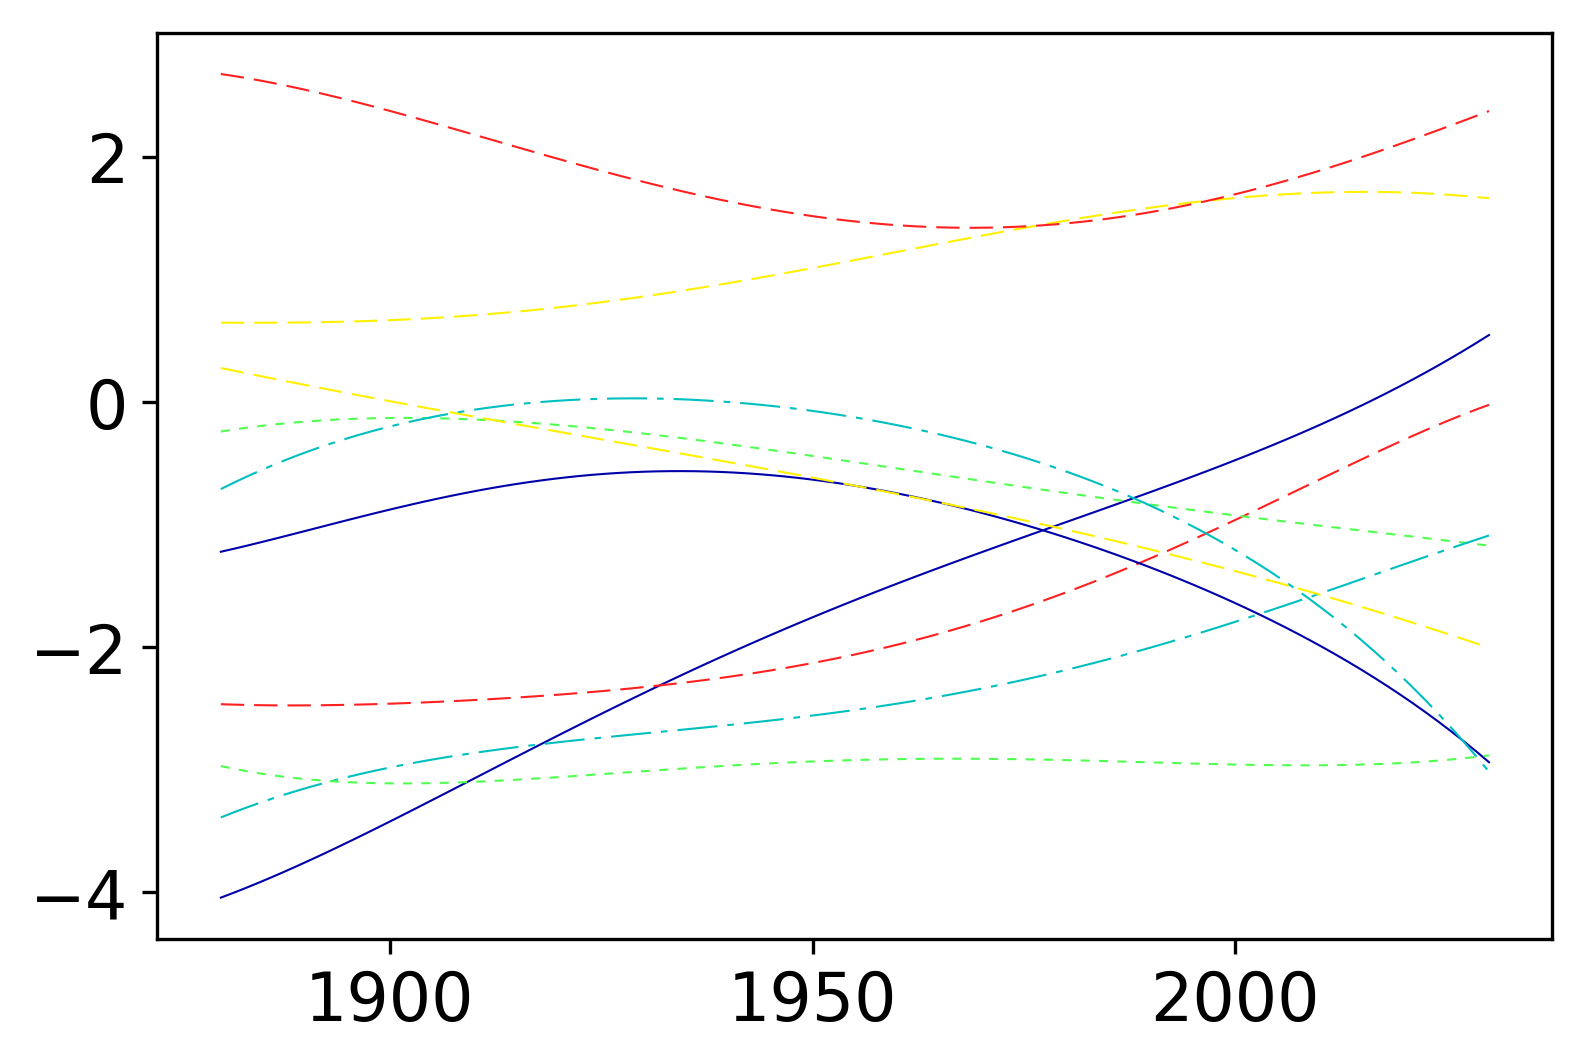

In [15]:
for i in np.arange(10):
    f_sample = np.random.multivariate_normal(mean=np.zeros(x_pred.size), cov=K)
    plt.plot(x_pred.flatten(), f_sample.flatten())

These look very similar! Indeed, they are effectively drawn from the same multivariate normal density.

When sampling $\mathbf{f}$ directly we created the covariance for $\mathbf{f}$. We can visualise the covariance matrix: 

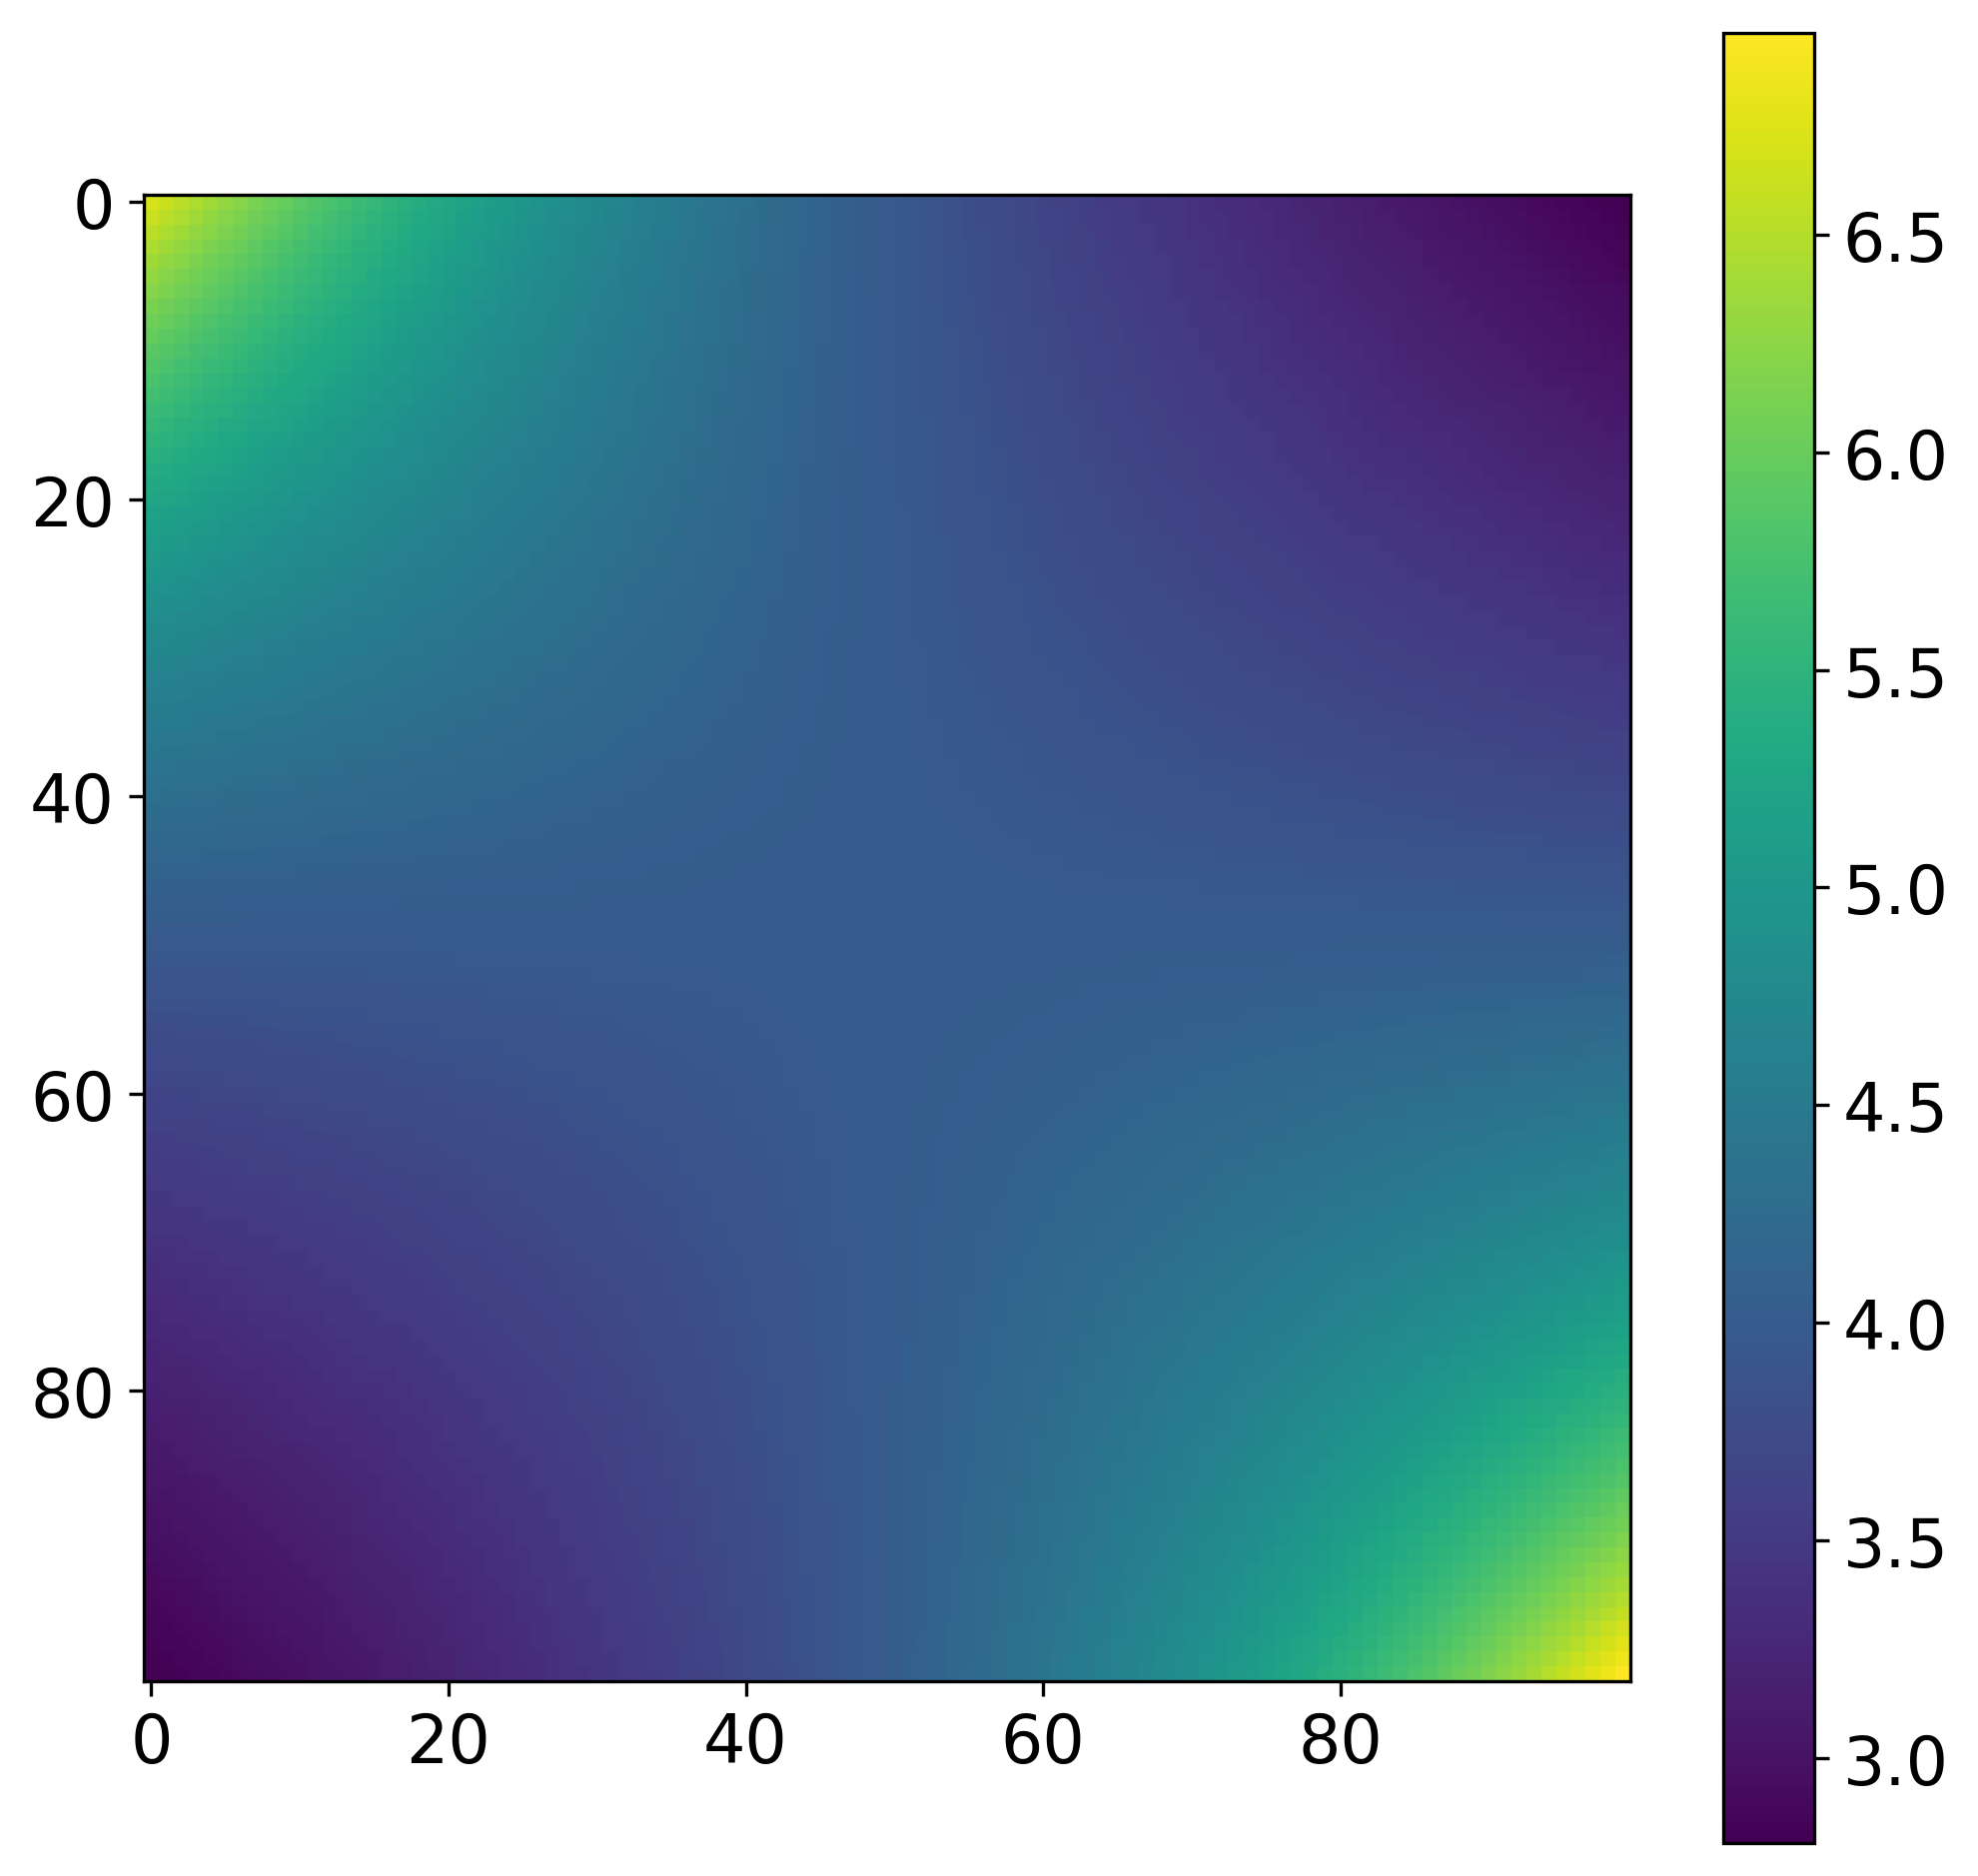

In [16]:
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(K, interpolation='none')
fig.colorbar(im) 

### Noisy functions

We normally add Gaussian noise to obtain our observations: 
$$
\mathbf{y} = \mathbf{f} + \boldsymbol{\epsilon}
$$

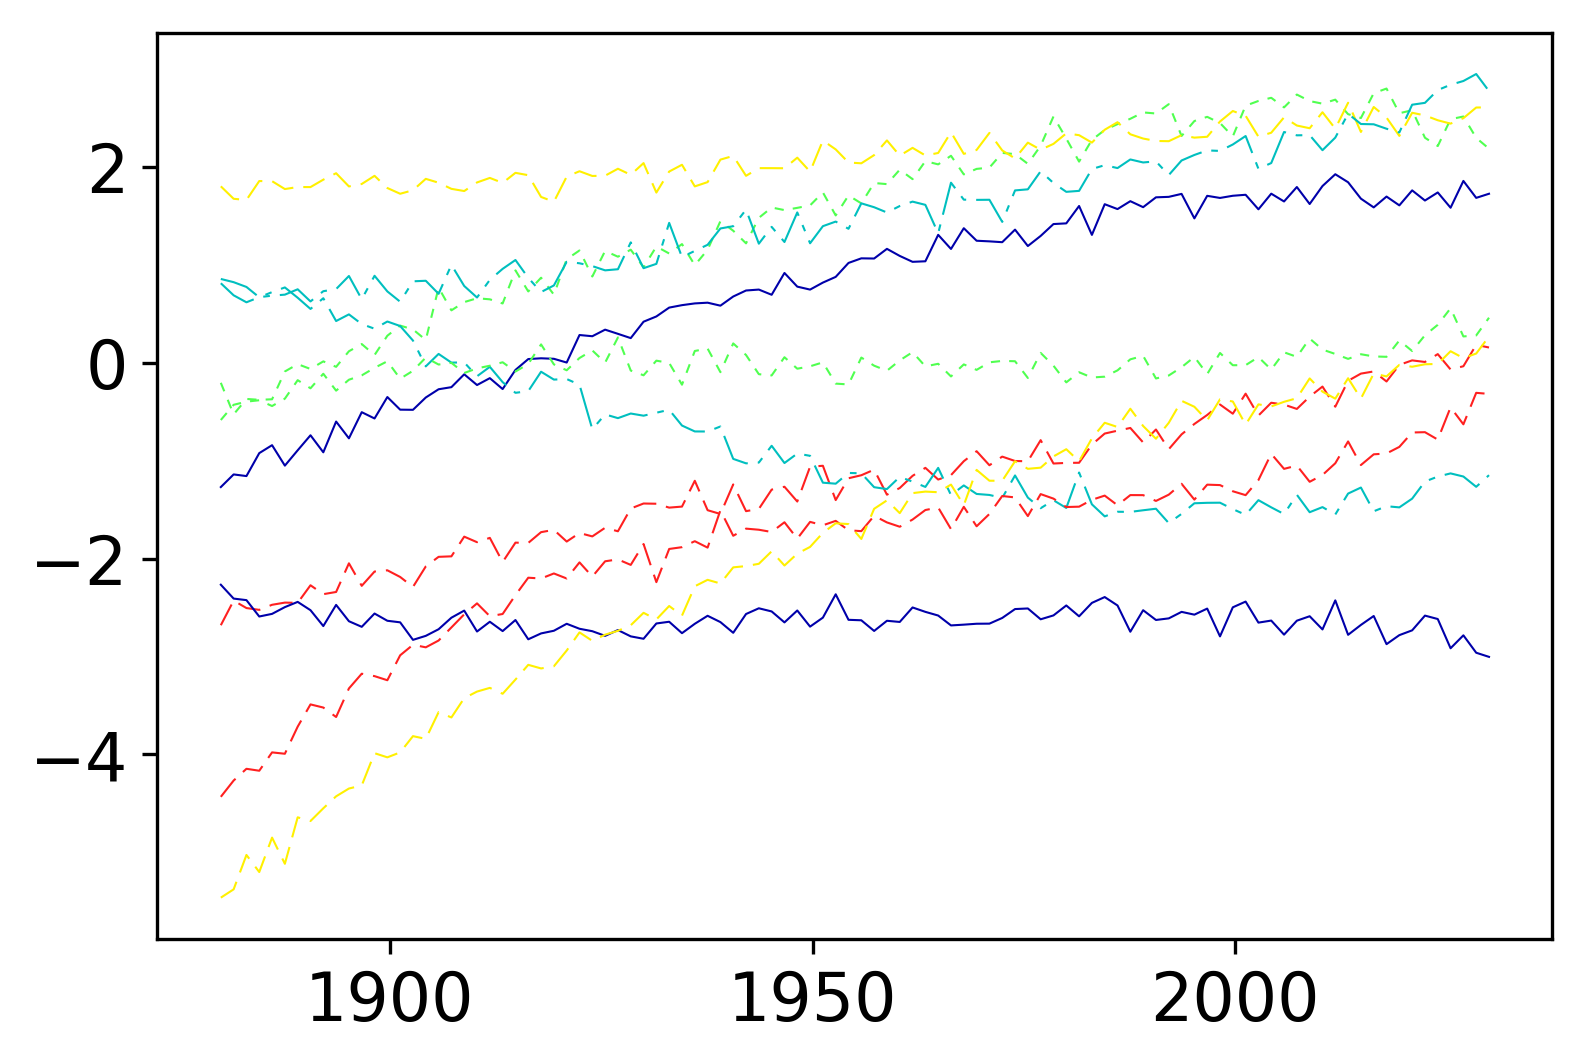

In [17]:
K = alpha*np.dot(Phi_pred, Phi_pred.T) + sigma2*np.eye(x_pred.size)
for i in range(10):
    y_sample = np.random.multivariate_normal(mean=np.zeros(x_pred.size), cov=K)
    plt.plot(x_pred.flatten(), y_sample.flatten())

We can also increase the variance of the noise

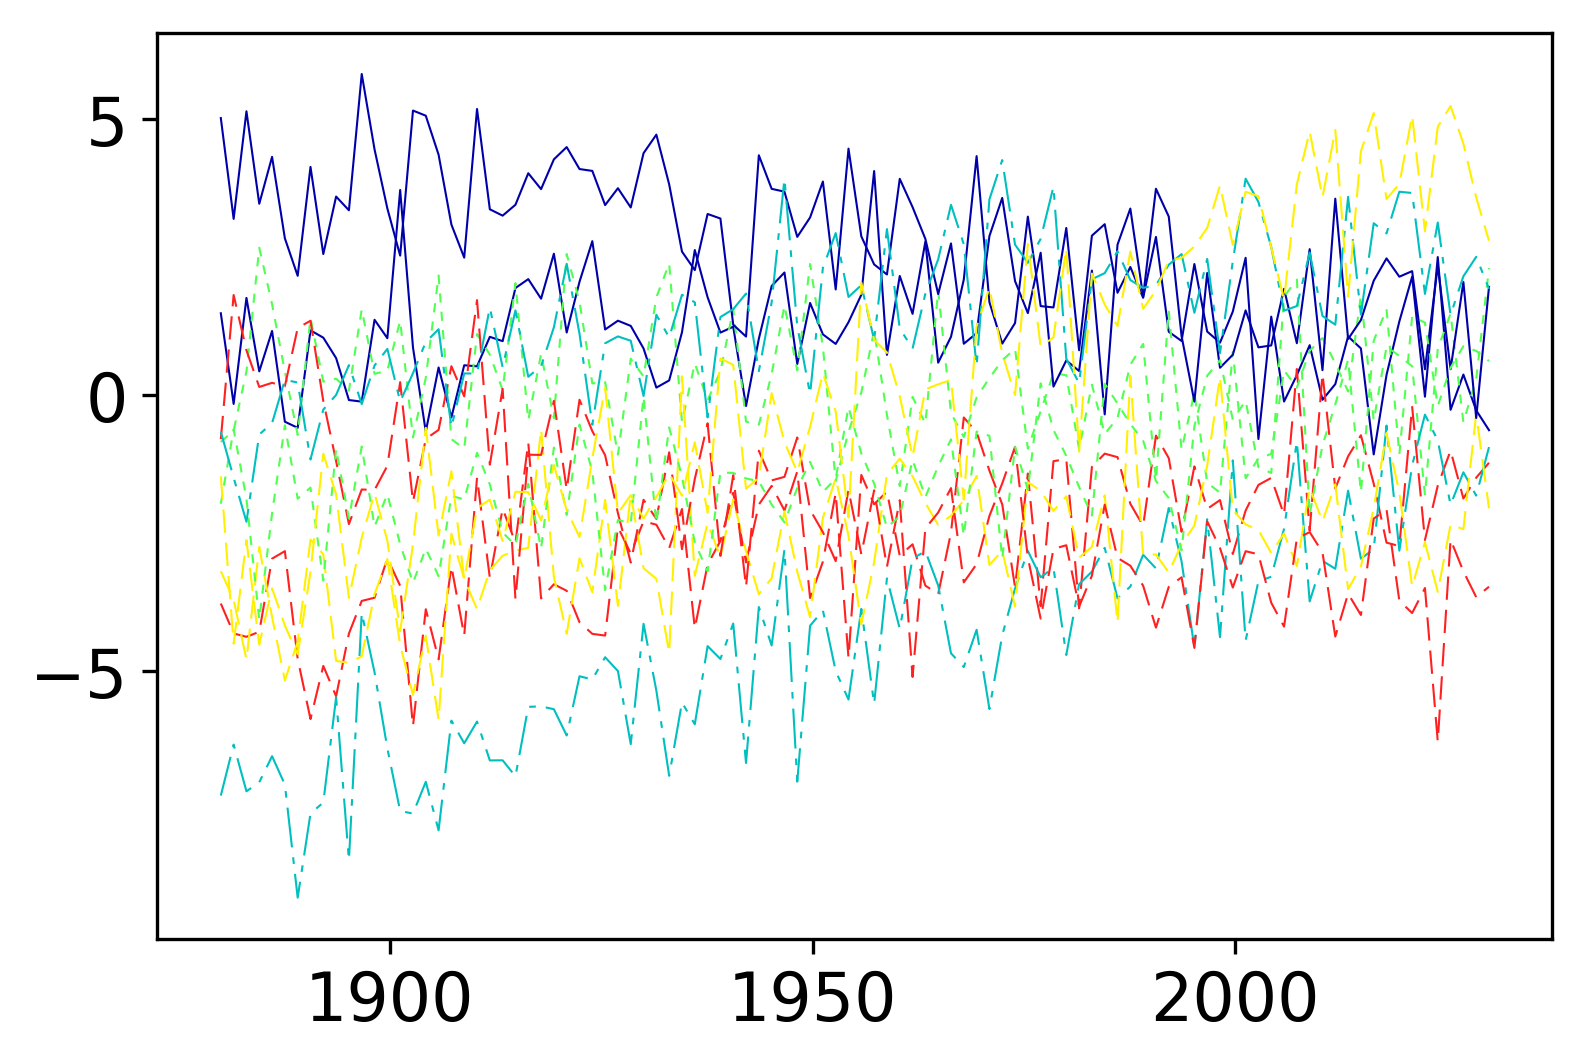

In [18]:
sigma2 = 1.
K = alpha*np.dot(Phi_pred, Phi_pred.T) + sigma2*np.eye(x_pred.size)
for i in range(10):
    y_sample = np.random.multivariate_normal(mean=np.zeros(x_pred.size), cov=K)
    plt.plot(x_pred.flatten(), y_sample.flatten())

## Gaussian Process

In a Gaussian process you specify the *covariance function* directly, rather than *implicitly* through a basis matrix and a prior over parameters. 

Gaussian processes have the advantage that they can be *nonparametric*: they can have *infinite* basis functions.

The RBF (Gaussian) covariance function is specified by
$$
k(\mathbf{x}, \mathbf{x}^\prime) = \alpha \exp\left( -\frac{\left\Vert \mathbf{x}-\mathbf{x}^\prime\right\Vert^2}{2\ell^2}\right).
$$
where $\left\Vert\mathbf{x} - \mathbf{x}^\prime\right\Vert^2$ is the squared distance between the two input vectors 
$$
\left\Vert\mathbf{x} - \mathbf{x}^\prime\right\Vert^2 = (\mathbf{x} - \mathbf{x}^\prime)^\top (\mathbf{x} - \mathbf{x}^\prime) 
$$
Let's build a covariance matrix based on this function.

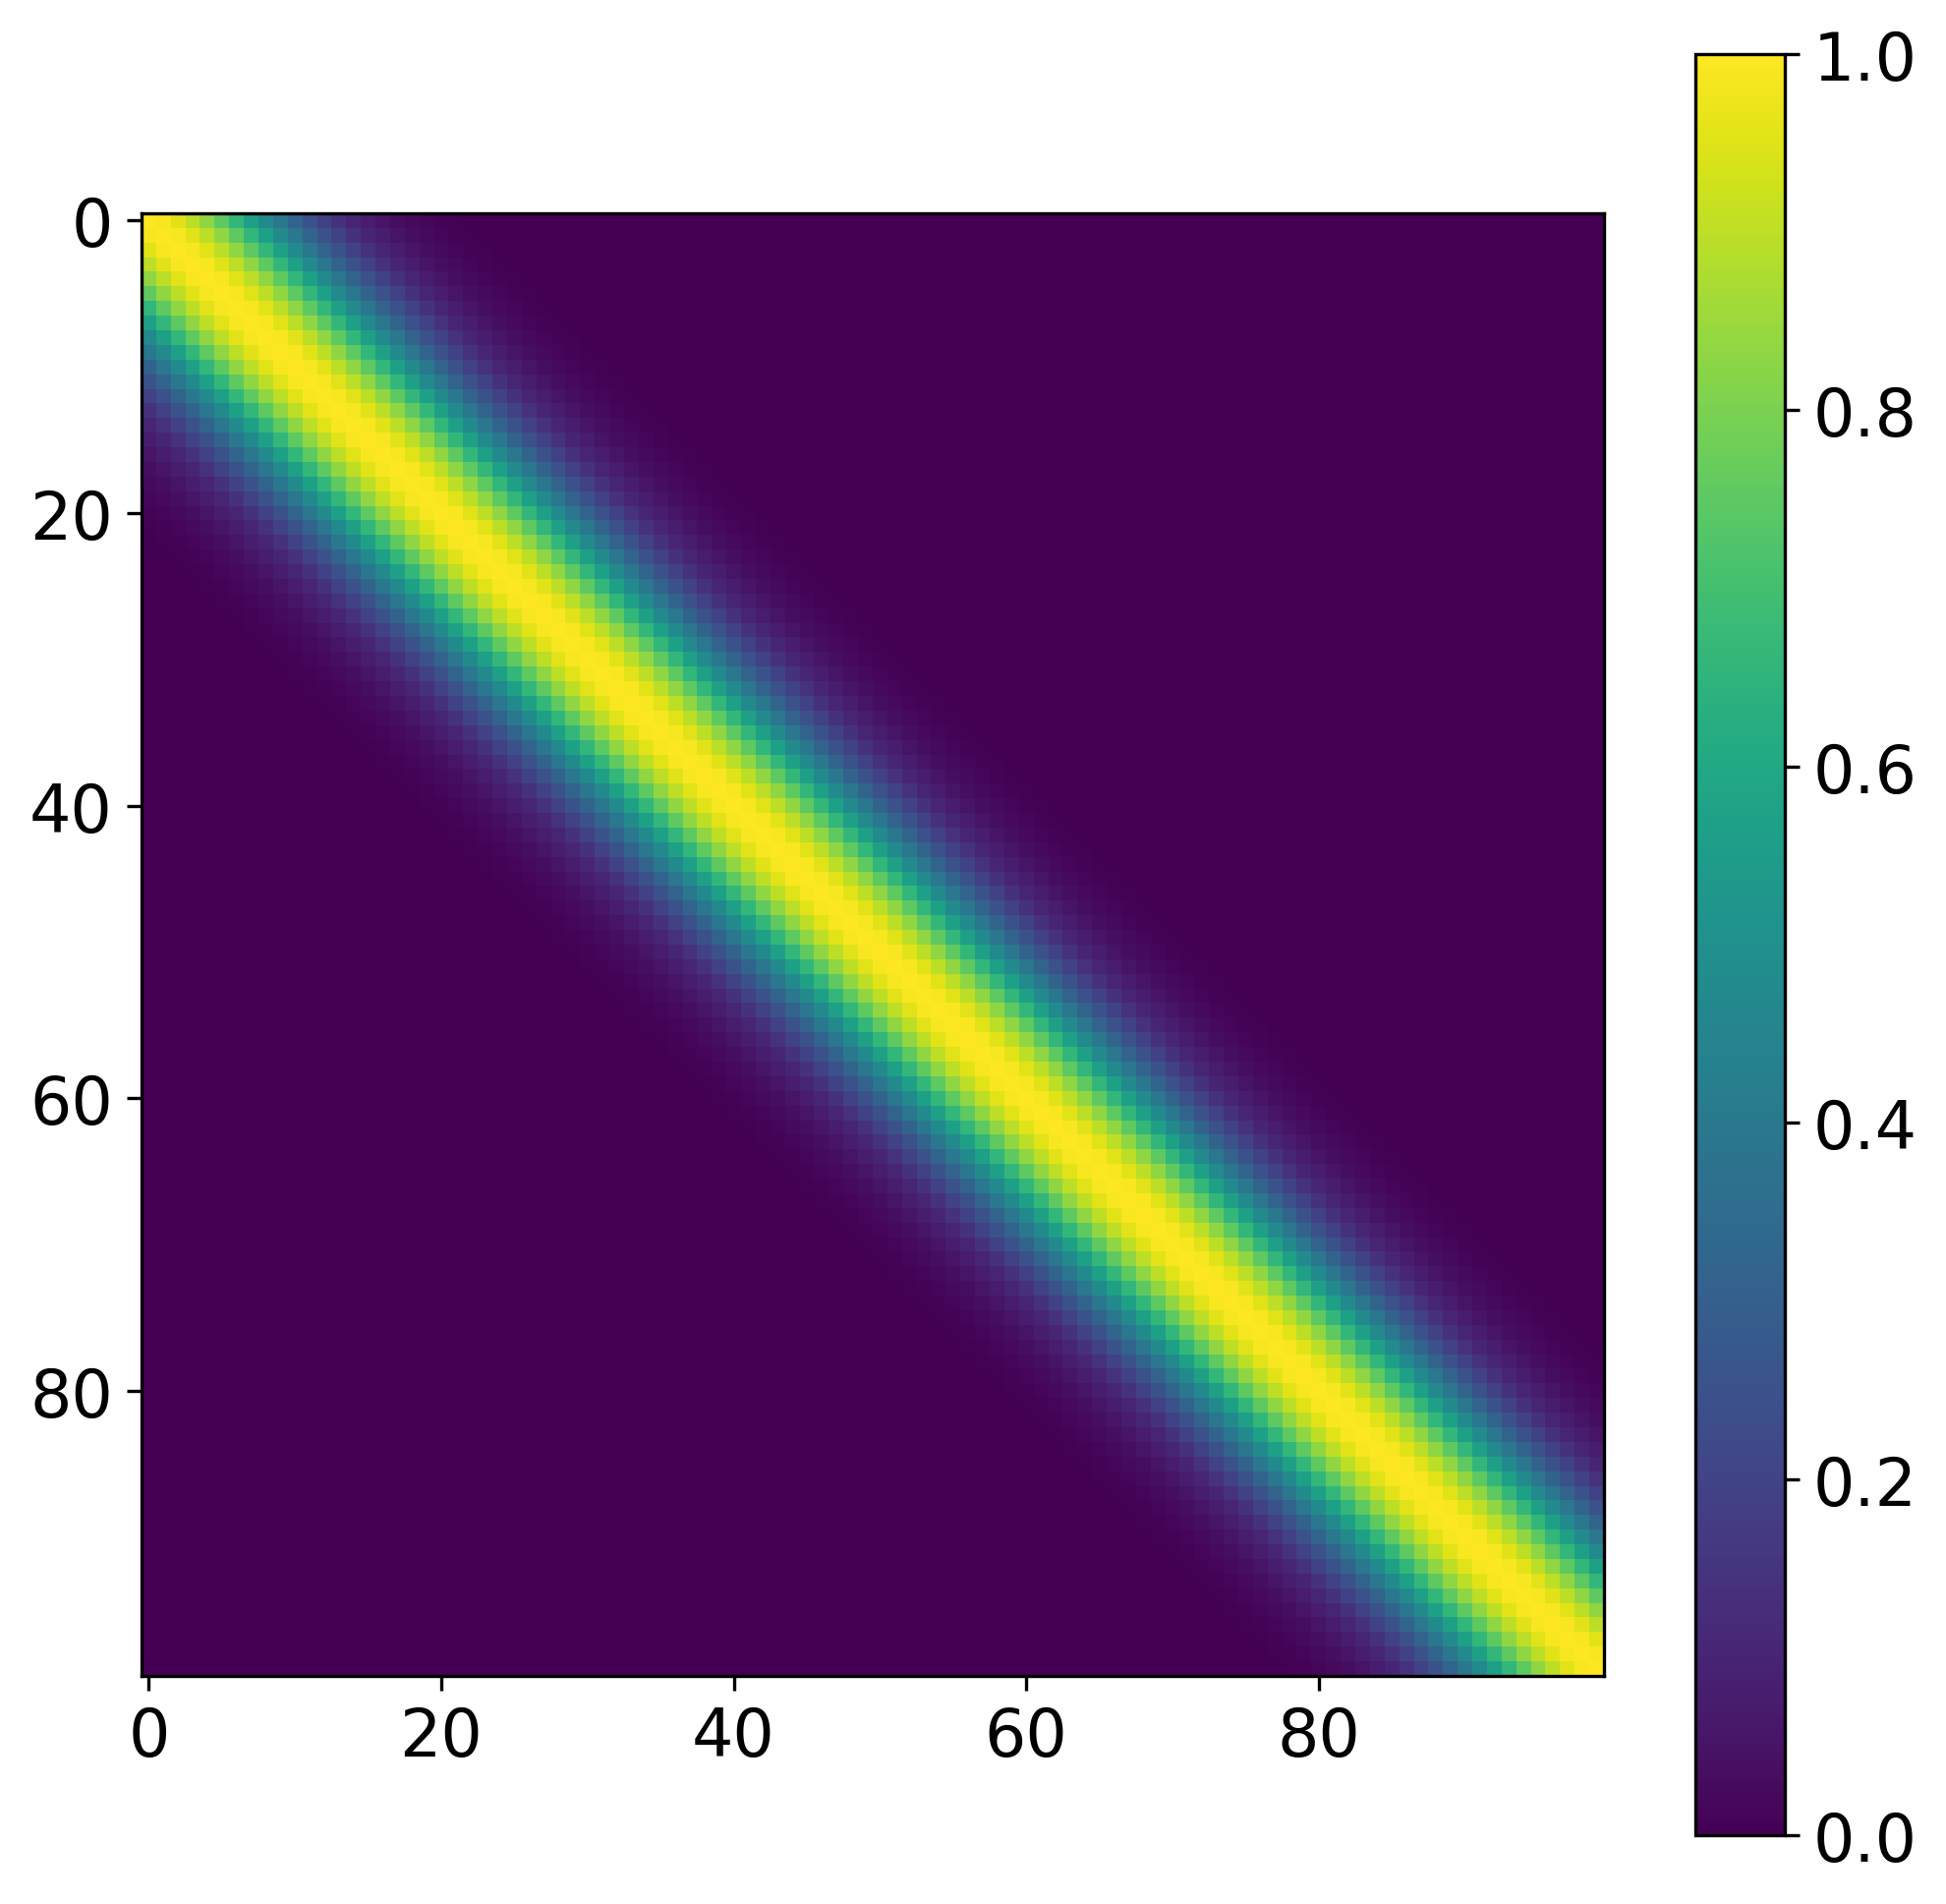

In [19]:
# Exponentiated quadratic is another name for RBF
def exponentiated_quadratic(x, x_prime, variance, lengthscale):
    squared_distance = ((x-x_prime)**2).sum()
    return variance*np.exp((-0.5*squared_distance)/lengthscale**2)

# Compute covariances directly
def compute_kernel(X, X2, kernel, **kwargs):
    K = np.zeros((X.shape[0], X2.shape[0])) 
im = ax.imshow(K, interpolation='none')
fig.colorbar(im)

Finally, we can sample functions with this kernel (covariance matrix)

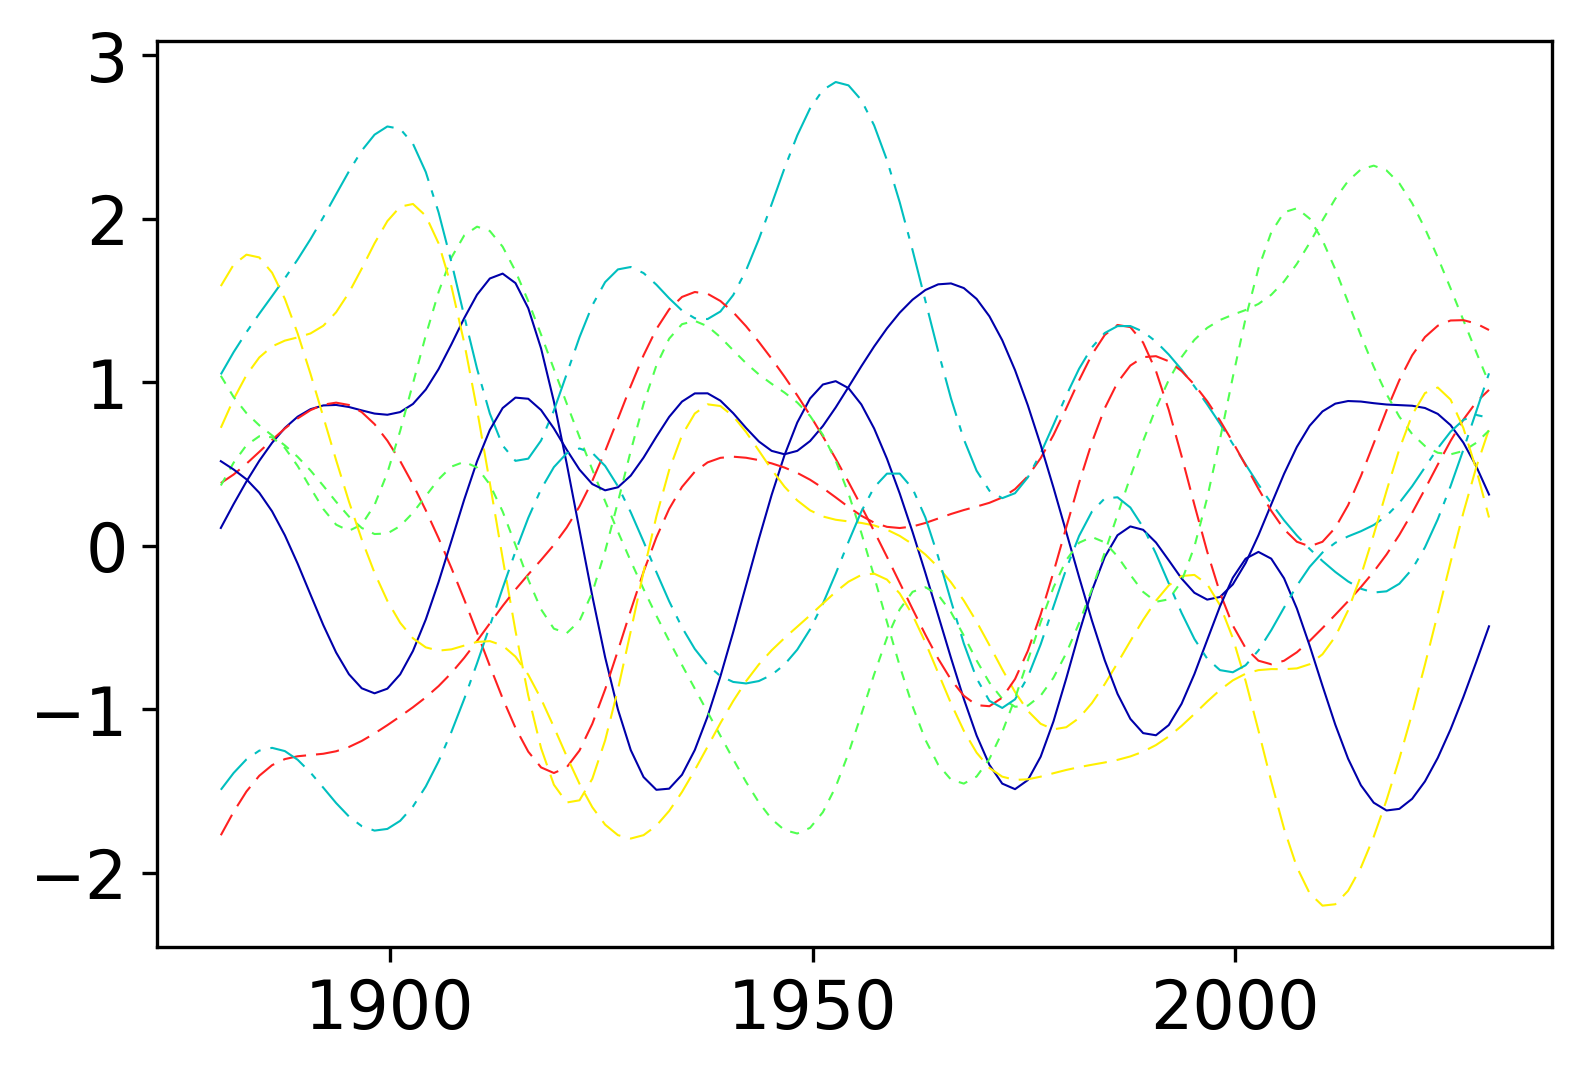

In [20]:
for i in range(10):
    y_sample = np.random.multivariate_normal(mean=np.zeros(x_pred.size), cov=K)
    plt.plot(x_pred.flatten(), y_sample.flatten())

## Gaussian process optimization

The Gaussian process perspective takes the marginal likelihood of the data to be a joint Gaussian density with a covariance given by $\mathbf{K}$. 

The model likelihood is of the form,
$$
p(\mathbf{y}|\mathbf{X}) = \frac{1}{(2\pi)^{\frac{n}{2}}|\mathbf{K}|^{\frac{1}{2}}} \exp\left(-\frac{1}{2}\mathbf{y}^\top \left(\mathbf{K}+\sigma^2 \mathbf{I}\right)^{-1}\mathbf{y}\right)
$$
where the input data, $\mathbf{X}$, influences the density through the covariance matrix, $\mathbf{K}$ whose elements are computed through the covariance function, $k(\mathbf{x}, \mathbf{x}^\prime)$.

Hence, the negative log likelihood (the objective function) is given by,
$$
E(\boldsymbol{\theta}) = \frac{1}{2} \log |\mathbf{K}| + \frac{1}{2} \mathbf{y}^\top \left(\mathbf{K} + \sigma^2\mathbf{I}\right)^{-1}\mathbf{y}
$$
where the *parameters* of the model are also embedded in the covariance function, they include the parameters of the kernel (such as lengthscale and variance), and the noise variance, $\sigma^2$.

In [21]:
class GP():
    def __init__(self, X, y, sigma2, kernel, **kwargs):
        self.K = compute_kernel(X, X, kernel, **kwargs)
        self.X = X
        self.y = y
        self.sigma2 = sigma2
        self.kernel = kernel
        self.kernel_args = kwargs
        self.update_inverse()
    
    def update_inverse(self):
        # Preompute the inverse covariance and some quantities of interest
        ## NOTE: This is not the correct *numerical* way to compute this! It is for ease of use.
        self.Kinv = np.linalg.inv(self.K+self.sigma2*np.eye(self.K.shape[0]))
        # the log determinant of the covariance matrix.
        self.logdetK = np.linalg.det(self.K+self.sigma2*np.eye(self.K.shape[0]))
        # The matrix inner product of the inverse covariance
        self.Kinvy = np.dot(self.Kinv, self.y)
        self.yKinvy = (self.y*self.Kinvy).sum()

        
    def log_likelihood(self):
        # use the pre-computes to return the likelihood
        return -0.5*(self.K.shape[0]*np.log(2*np.pi) + self.logdetK + self.yKinvy)
    
    def objective(self):
        # use the pre-computes to return the objective function 
        return -self.log_likelihood()

### Making predictions
The model makes predictions for $\mathbf{f}$ that are unaffected by future values of $\mathbf{f}^*$.  
If we think of $\mathbf{f}^*$ as test points, we can still write down a joint probability density over the training observations, $\mathbf{f}$ and the test observations, $\mathbf{f}^*$. 

This joint probability density will be Gaussian, with a covariance matrix given by our covariance function, $k(\mathbf{x}_i, \mathbf{x}_j)$. 
$$
\begin{bmatrix}\mathbf{f} \\ \mathbf{f}^*\end{bmatrix} \sim \mathcal{N}\left(\mathbf{0}, \begin{bmatrix} \mathbf{K} & \mathbf{K}_\ast \\ \mathbf{K}_\ast^\top & \mathbf{K}_{\ast,\ast}\end{bmatrix}\right)
$$

where $\mathbf{K}$ is the covariance computed between all the training points,  
$\mathbf{K}_\ast$ is the covariance matrix computed between the training points and the test points,  
$\mathbf{K}_{\ast,\ast}$ is the covariance matrix computed between all the tests points and themselves. 

## Conditional Density

Just as in naive Bayes, we defined the joint density (although there it was over both the labels and the inputs, $p(\mathbf{y}, \mathbf{X})$ and now we need to define *conditional* distributions that answer particular questions of interest. 

We will need the *conditional density* for making predictions.
$$
\mathbf{f}^* | \mathbf{y} \sim \mathcal{N}(\boldsymbol{\mu}_f,\mathbf{C}_f)
$$
with a mean given by
$$
\boldsymbol{\mu}_f = \mathbf{K}_*^\top \left[\mathbf{K} + \sigma^2 \mathbf{I}\right]^{-1} \mathbf{y}
$$
and a covariance given by 
$$
\mathbf{C}_f = \mathbf{K}_{*,*} - \mathbf{K}_*^\top \left[\mathbf{K} + \sigma^2 \mathbf{I}\right]^{-1} \mathbf{K}_\ast.
$$
Let's compute what those posterior predictions are for the olympic marathon data.

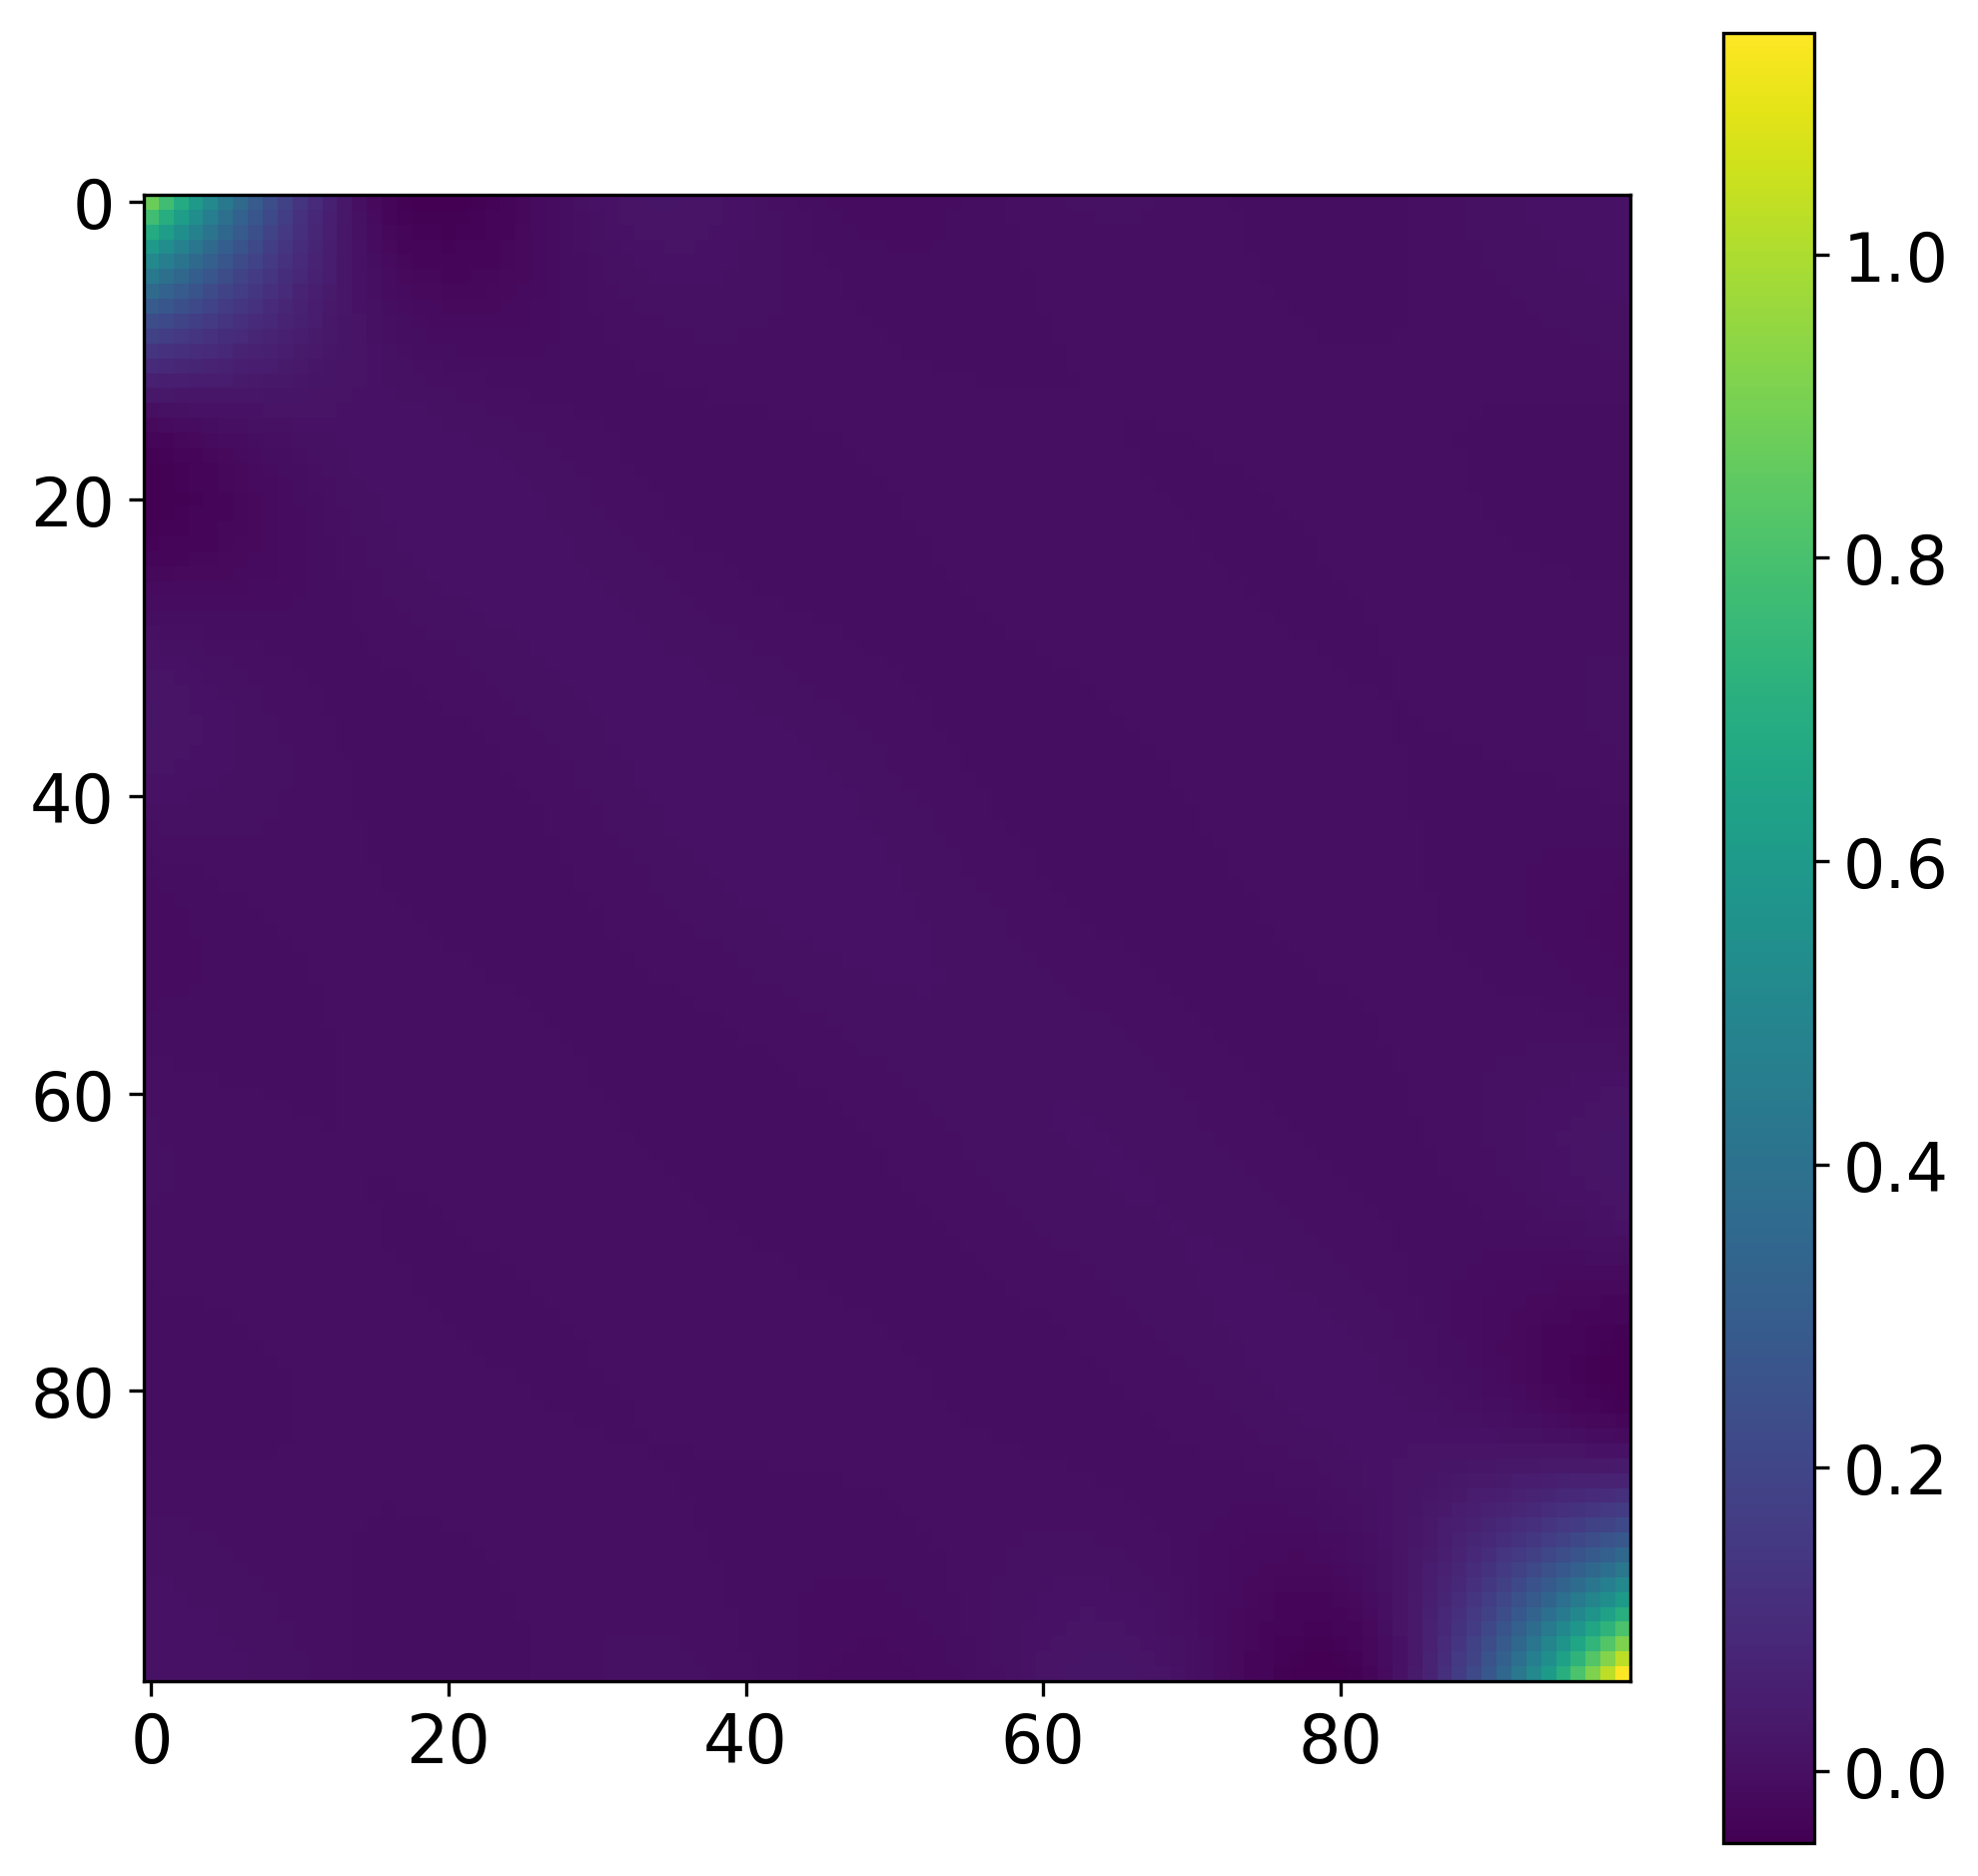

In [22]:
# set covariance function parameters
variance = 16.0
lengthscale = 32
# set noise variance
sigma2 = 0.05

def posterior_f(self, X_test):
    K_star = compute_kernel(self.X, X_test, self.kernel, **self.kernel_args)
    K_starstar = compute_kernel(X_test, X_test, self.kernel, **self.kernel_args)
    A = np.dot(self.Kinv, K_star)
    mu_f = np.dot(A.T, y)
    C_f = K_starstar - np.dot(A.T, K_star)
    return mu_f, C_f

# attach the new method to class GP():
GP.posterior_f = posterior_f

model = GP(x, y, sigma2, exponentiated_quadratic, variance=variance, lengthscale=lengthscale)
mu_f, C_f = model.posterior_f(x_pred)

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(C_f, interpolation='none')
fig.colorbar(im)

We can now plot the mean

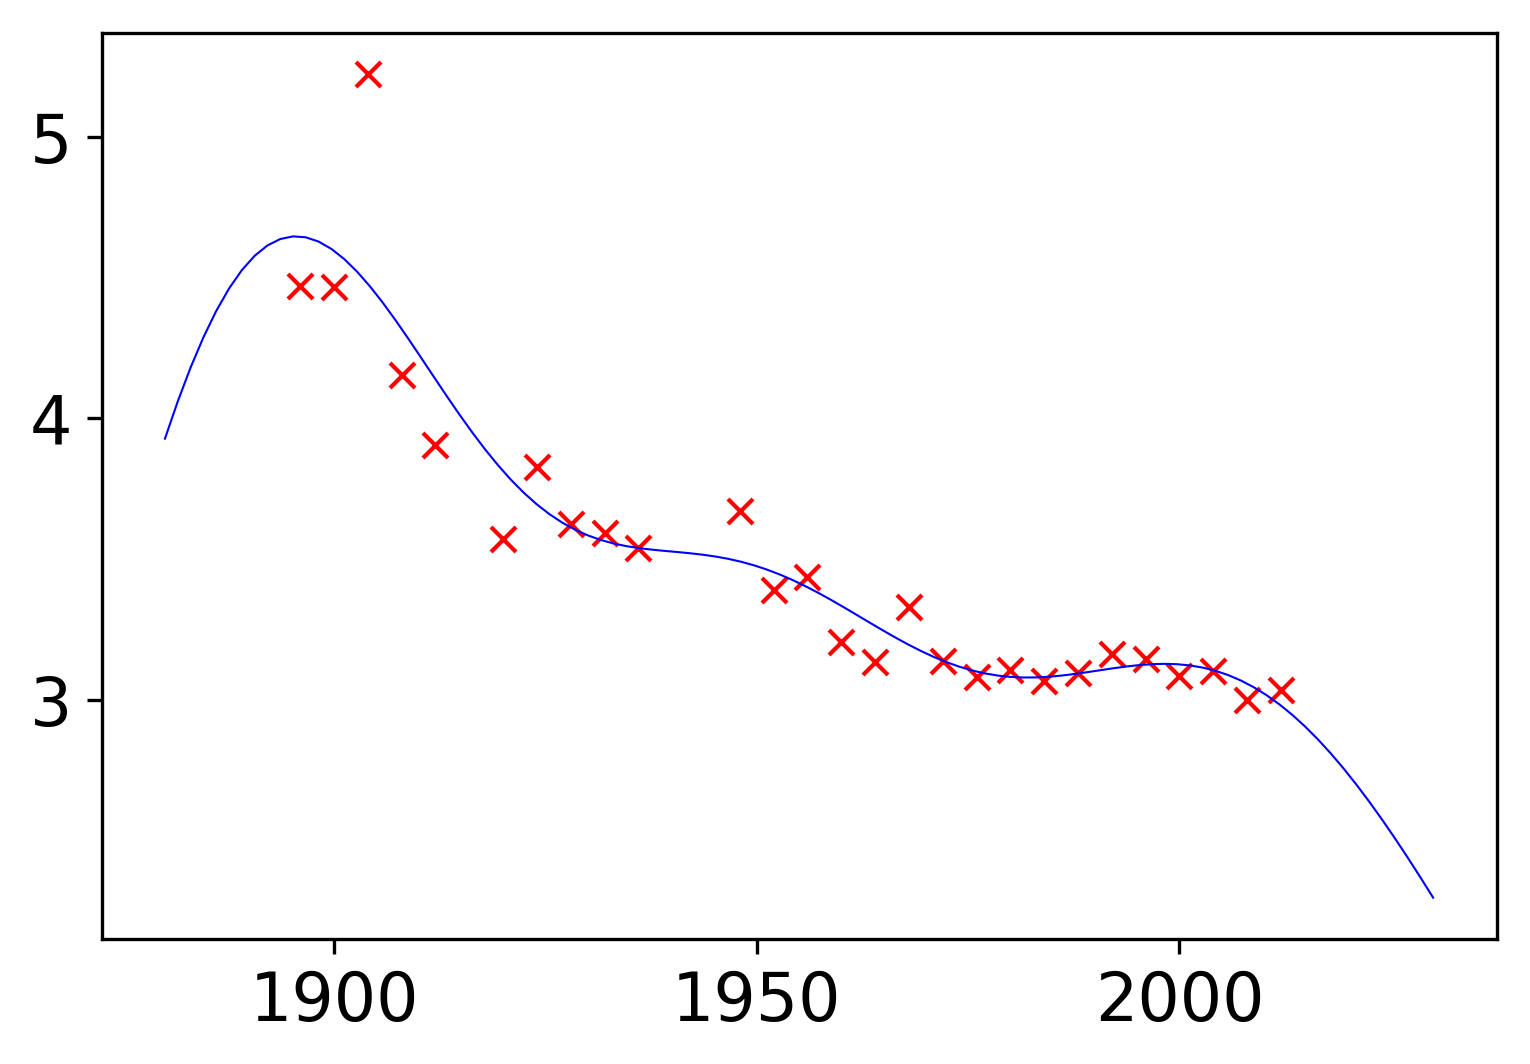

In [23]:
plt.plot(x, y, 'rx')
plt.plot(x_pred, mu_f, 'b-')

as well as the associated error bars

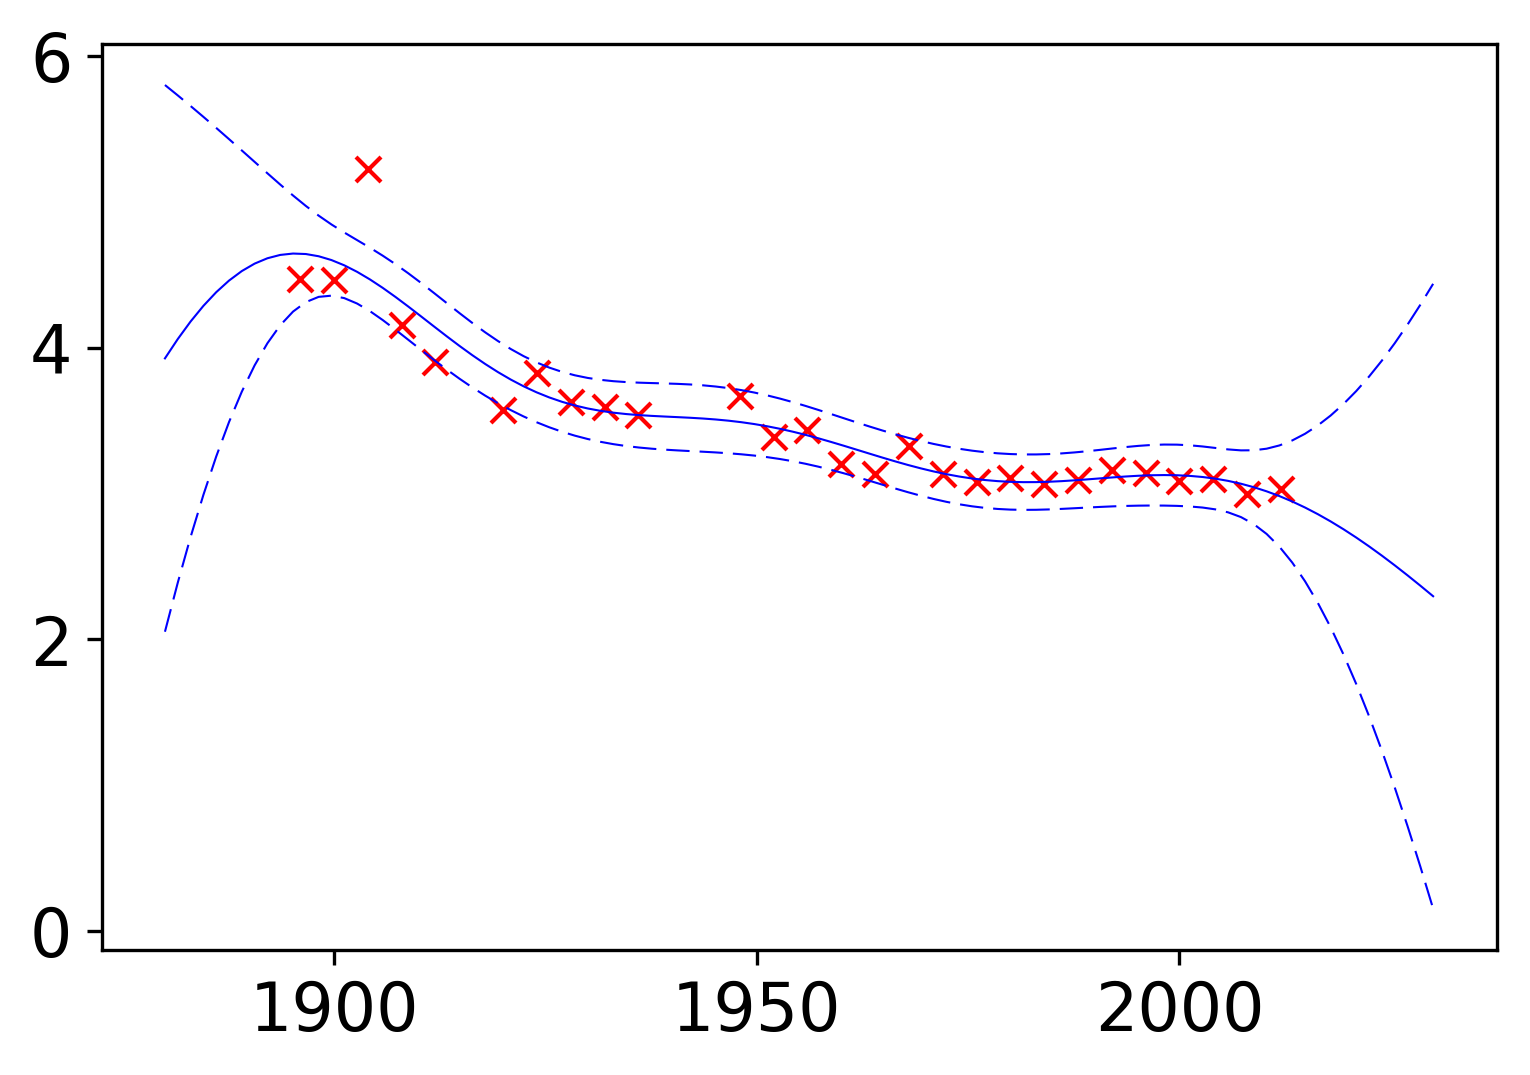

In [24]:
var_f = np.diag(C_f)[:, None]
std_f = np.sqrt(var_f)

plt.plot(x, y, 'rx')
plt.plot(x_pred, mu_f, 'b-')
plt.plot(x_pred, mu_f+2*std_f, 'b--')
plt.plot(x_pred, mu_f-2*std_f, 'b--')

## Gaussian Processes with GPy
- `GPyRegression`
- Generate a kernel first
    - State the dimensionality of your input data
    - Variance and lengthscale are optional, default = 1
```
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
```
    - Other kernels:
```
GPy.kern.BasisFuncKernel?
```
- Build model:
```
m = GPy.models.GPRegression(X,Y,kernel)
```


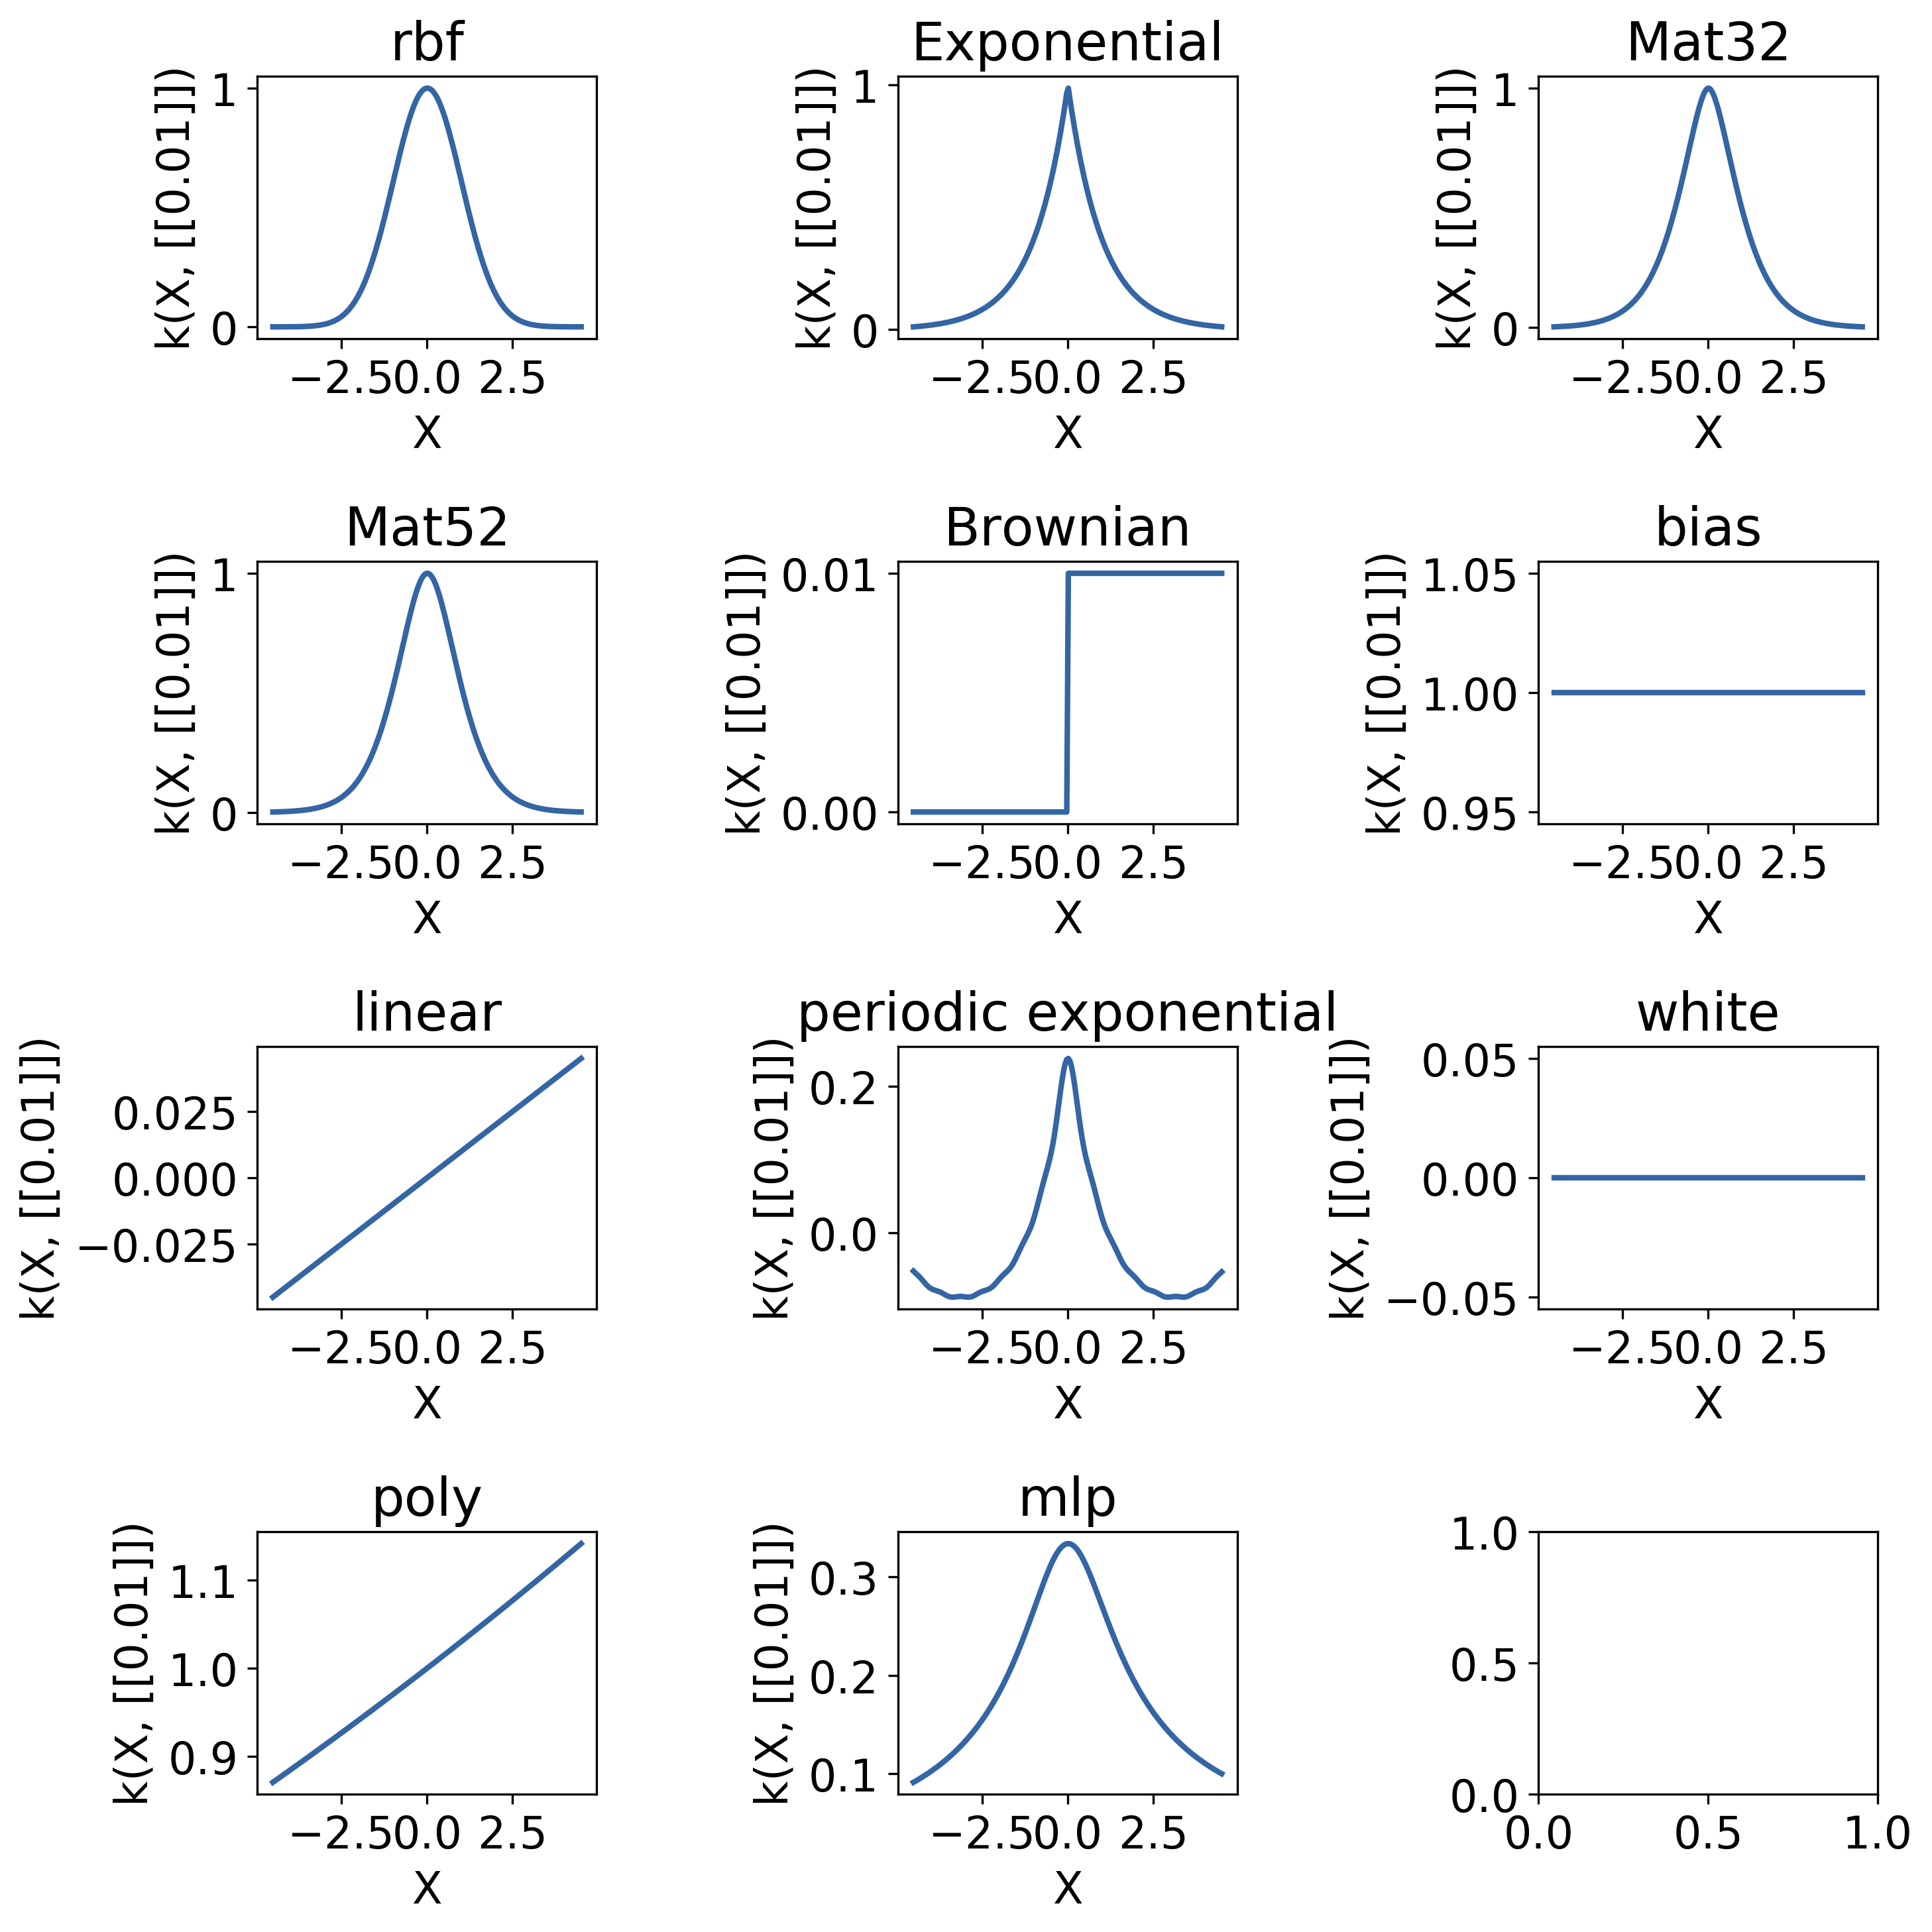

In [25]:
figure, axes = plt.subplots(4,3, figsize=(10,10), tight_layout=True)
kerns = [GPy.kern.RBF(1), GPy.kern.Exponential(1), GPy.kern.Matern32(1), 
         GPy.kern.Matern52(1), GPy.kern.Brownian(1),GPy.kern.Bias(1), 
         GPy.kern.Linear(1), GPy.kern.PeriodicExponential(1), GPy.kern.White(1), 
         GPy.kern.Poly(1), GPy.kern.MLP(1)]
 
for k,a in zip(kerns, axes.flatten()):
    k.plot(ax=a, x=0.01)
    a.set_title(k.name.replace('_', ' '))

`Matern` is a generalized RBF kernel that can scale between RBF and Exponential

Build the untrained GP. The shaded region corresponds to ~95% confidence intervals (i.e. +/- 2 standard deviation)

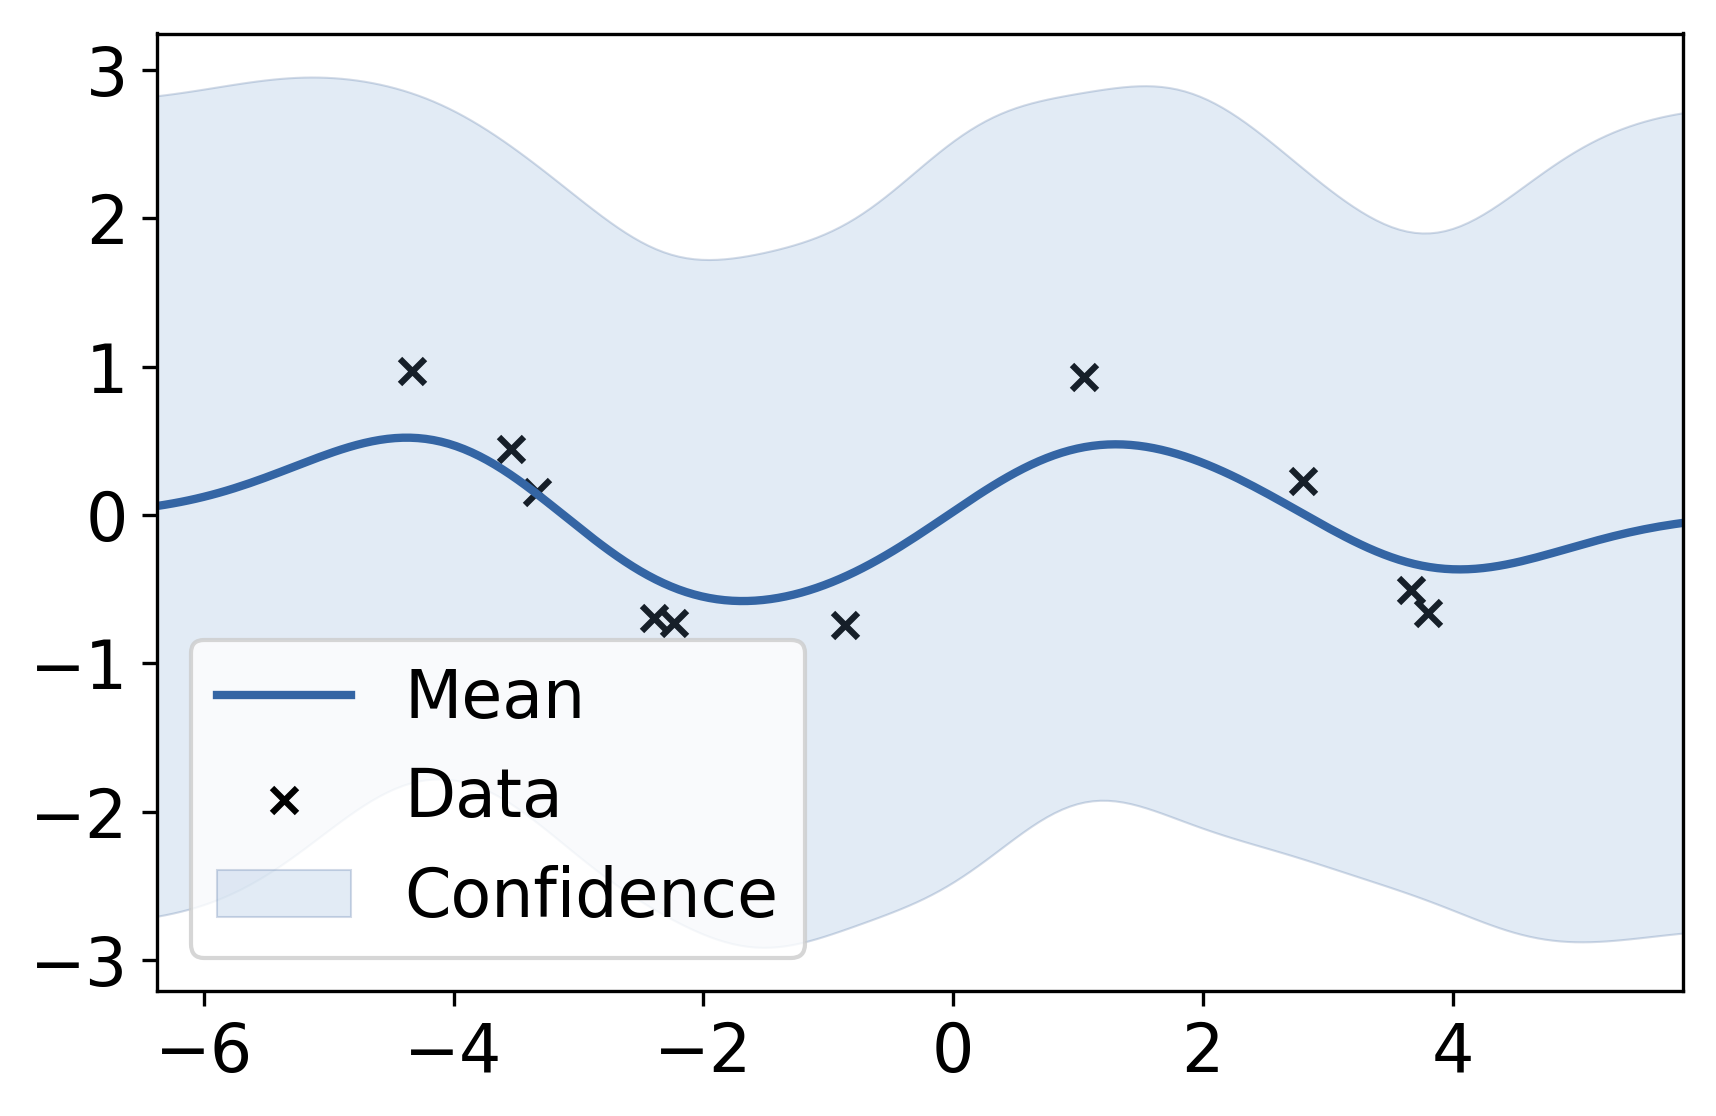

In [26]:
# Generate noisy sine data
X = np.random.uniform(-5.,5.,(10,1))
Y = np.sin(X) + np.random.randn(10,1)*0.05
 
# Build untrained model
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.) 
m = GPy.models.GPRegression(X,Y,kernel)
fig = m.plot()

Train the model (optimize the parameters): maximize the likelihood of the data.  
Best to optimize with a few restarts: the optimizer may converges to the high-noise solution. The optimizer is then restarted with a few random initialization of the parameter values.  

Optimization restart 1/10, f = 1.9854518294439778
Optimization restart 2/10, f = 2.1423407539940937
Optimization restart 3/10, f = 1.9854541833721582
Optimization restart 4/10, f = 2.1423407540438024
Optimization restart 5/10, f = 1.9854517873402049
Optimization restart 6/10, f = 1.985457647339203
Optimization restart 7/10, f = 2.142340753993895
Optimization restart 8/10, f = 1.9854518576244073
Optimization restart 9/10, f = 1.9854520653183405
Optimization restart 10/10, f = 2.142340753994045


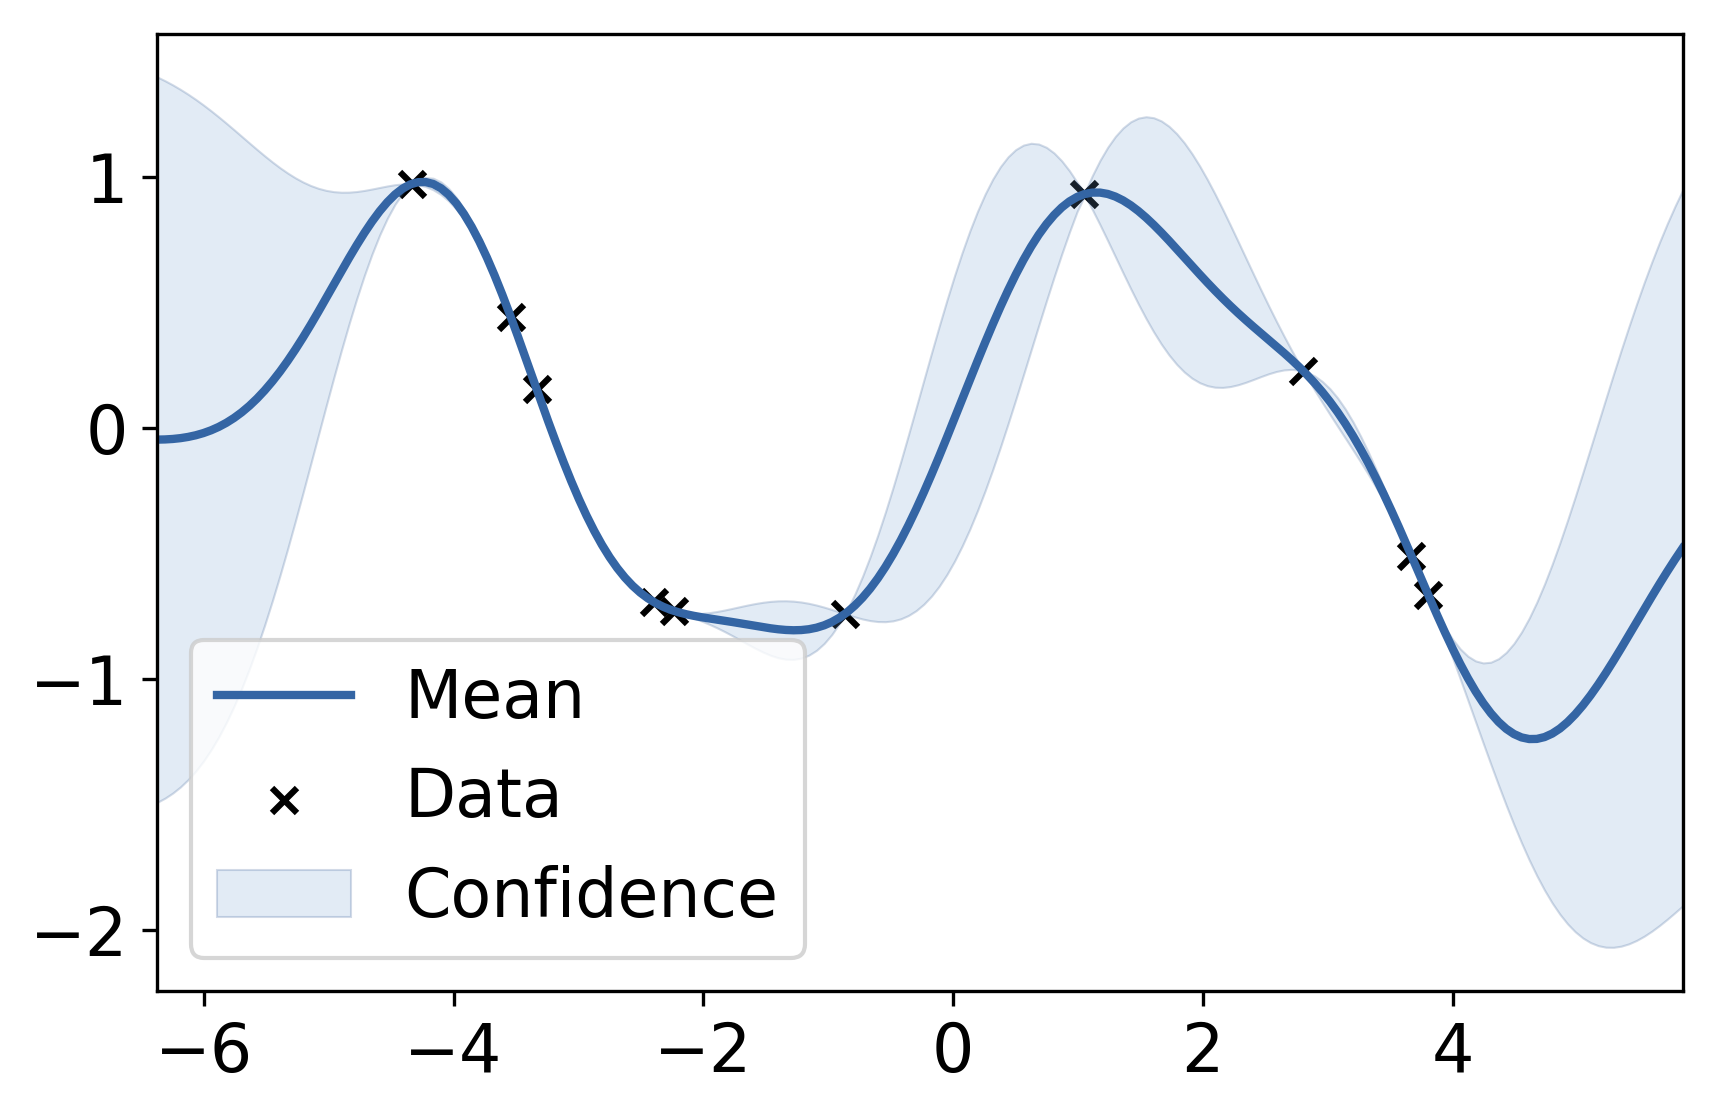

In [27]:
m.optimize_restarts(num_restarts = 10)
fig = m.plot()

You can also plot densities

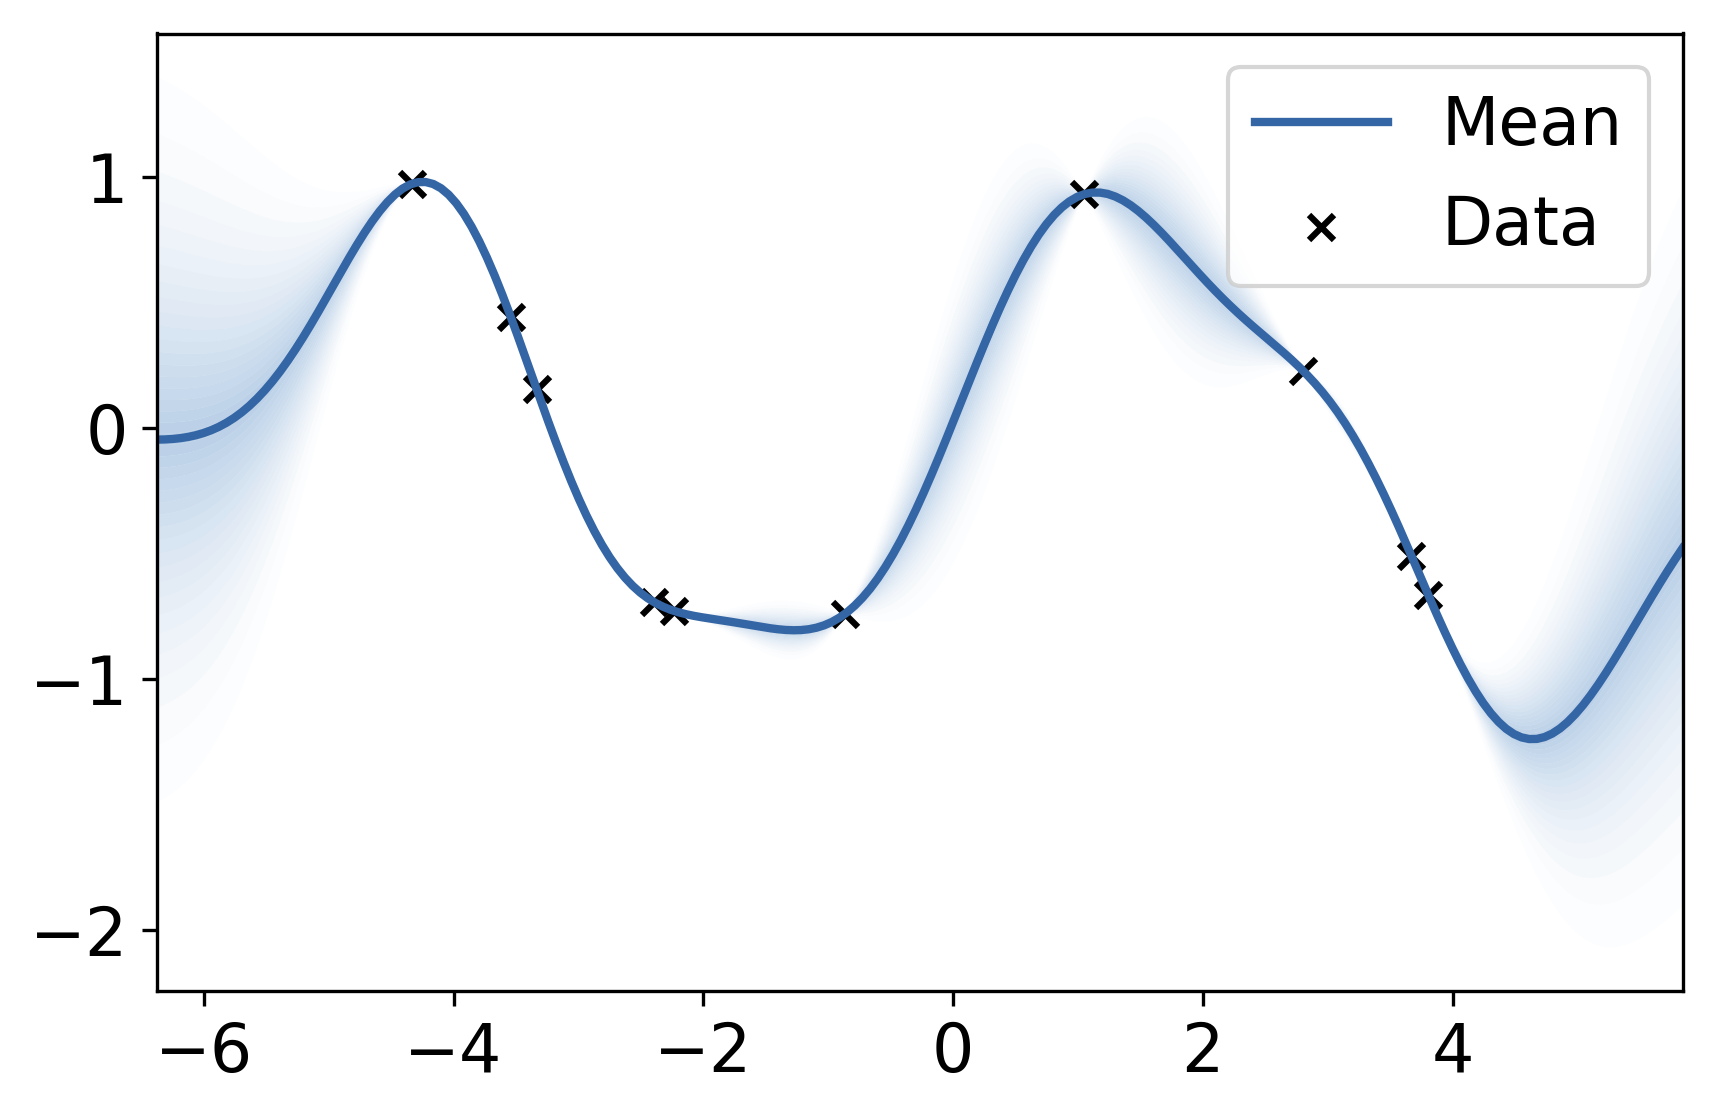

In [28]:
fig = m.plot(plot_density=True)

You can also show results in 2D

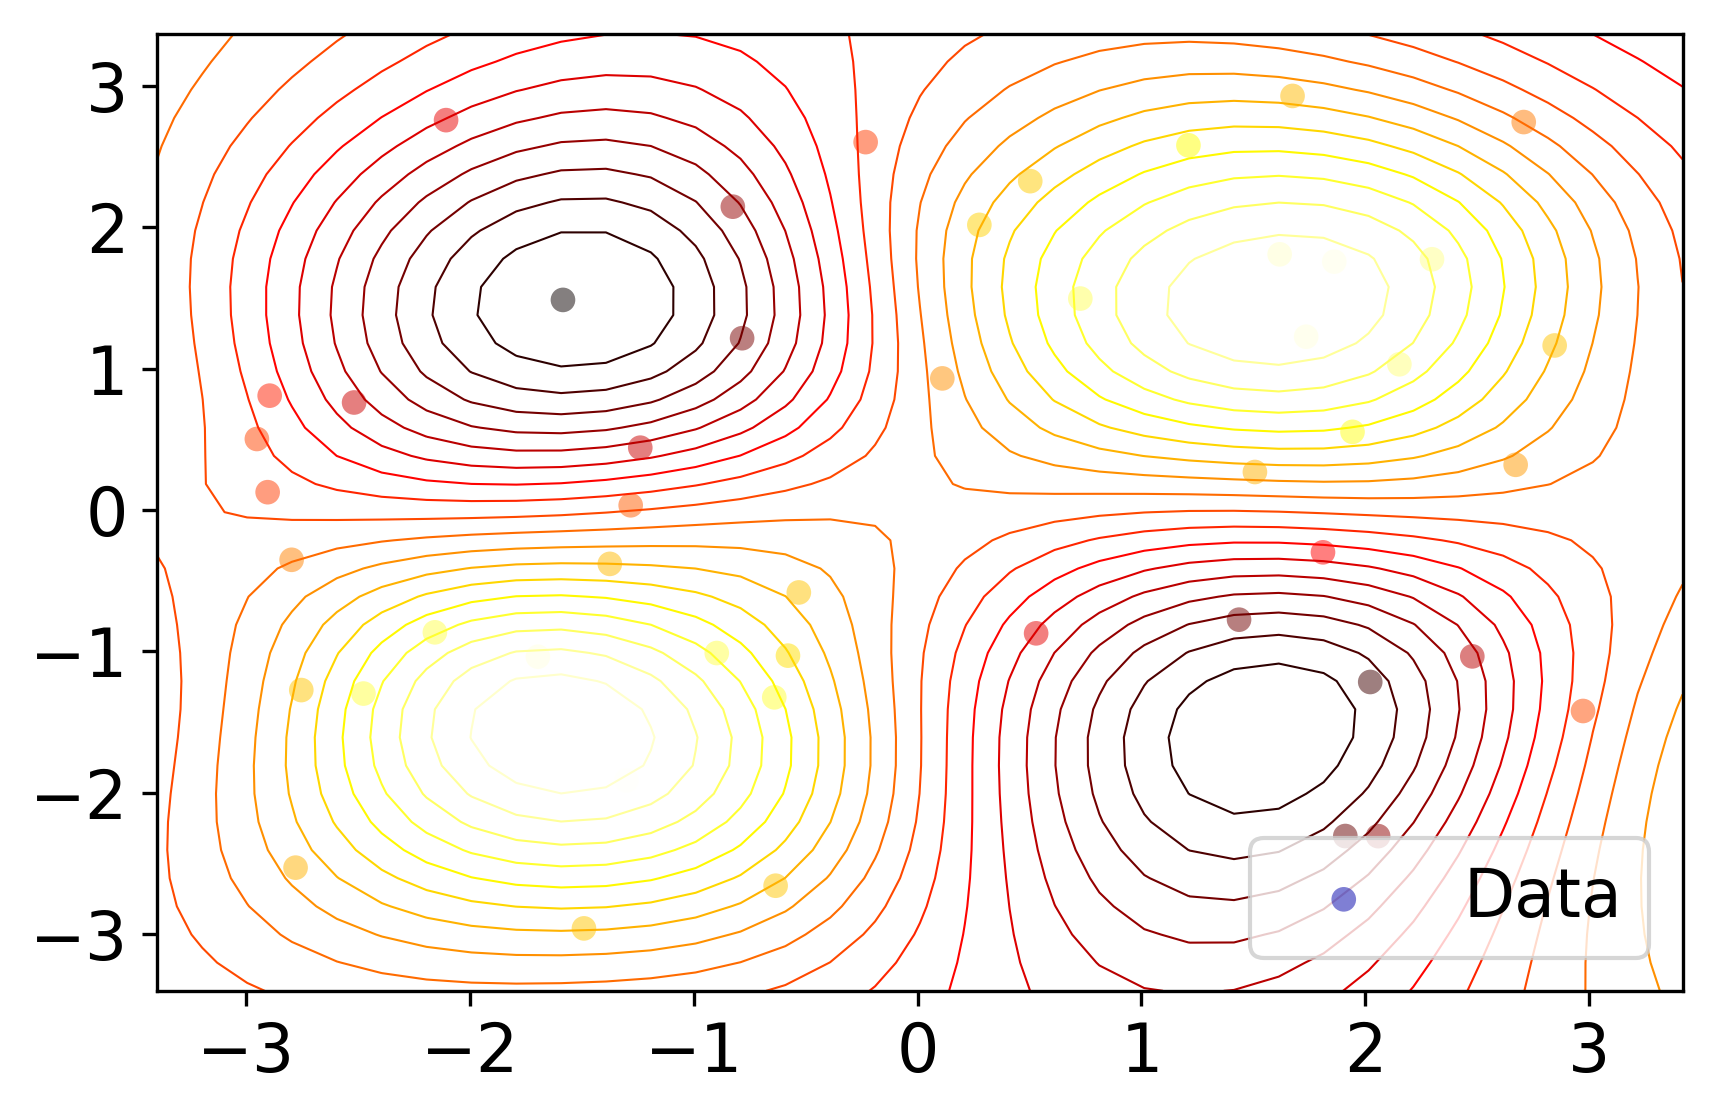

In [29]:
# sample inputs and outputs
X = np.random.uniform(-3.,3.,(50,2))
Y = np.sin(X[:,0:1]) * np.sin(X[:,1:2])+np.random.randn(50,1)*0.05 
ker = GPy.kern.Matern52(2,ARD=True) + GPy.kern.White(2)

# create simple GP model
m = GPy.models.GPRegression(X,Y,ker)

# optimize and plot
m.optimize(max_f_eval = 1000)
fig = m.plot()

We can plot 2D slices using the `fixed_inputs` argument to the plot function.  
`fixed_inputs` is a list of tuples containing which of the inputs to fix, and to which value.

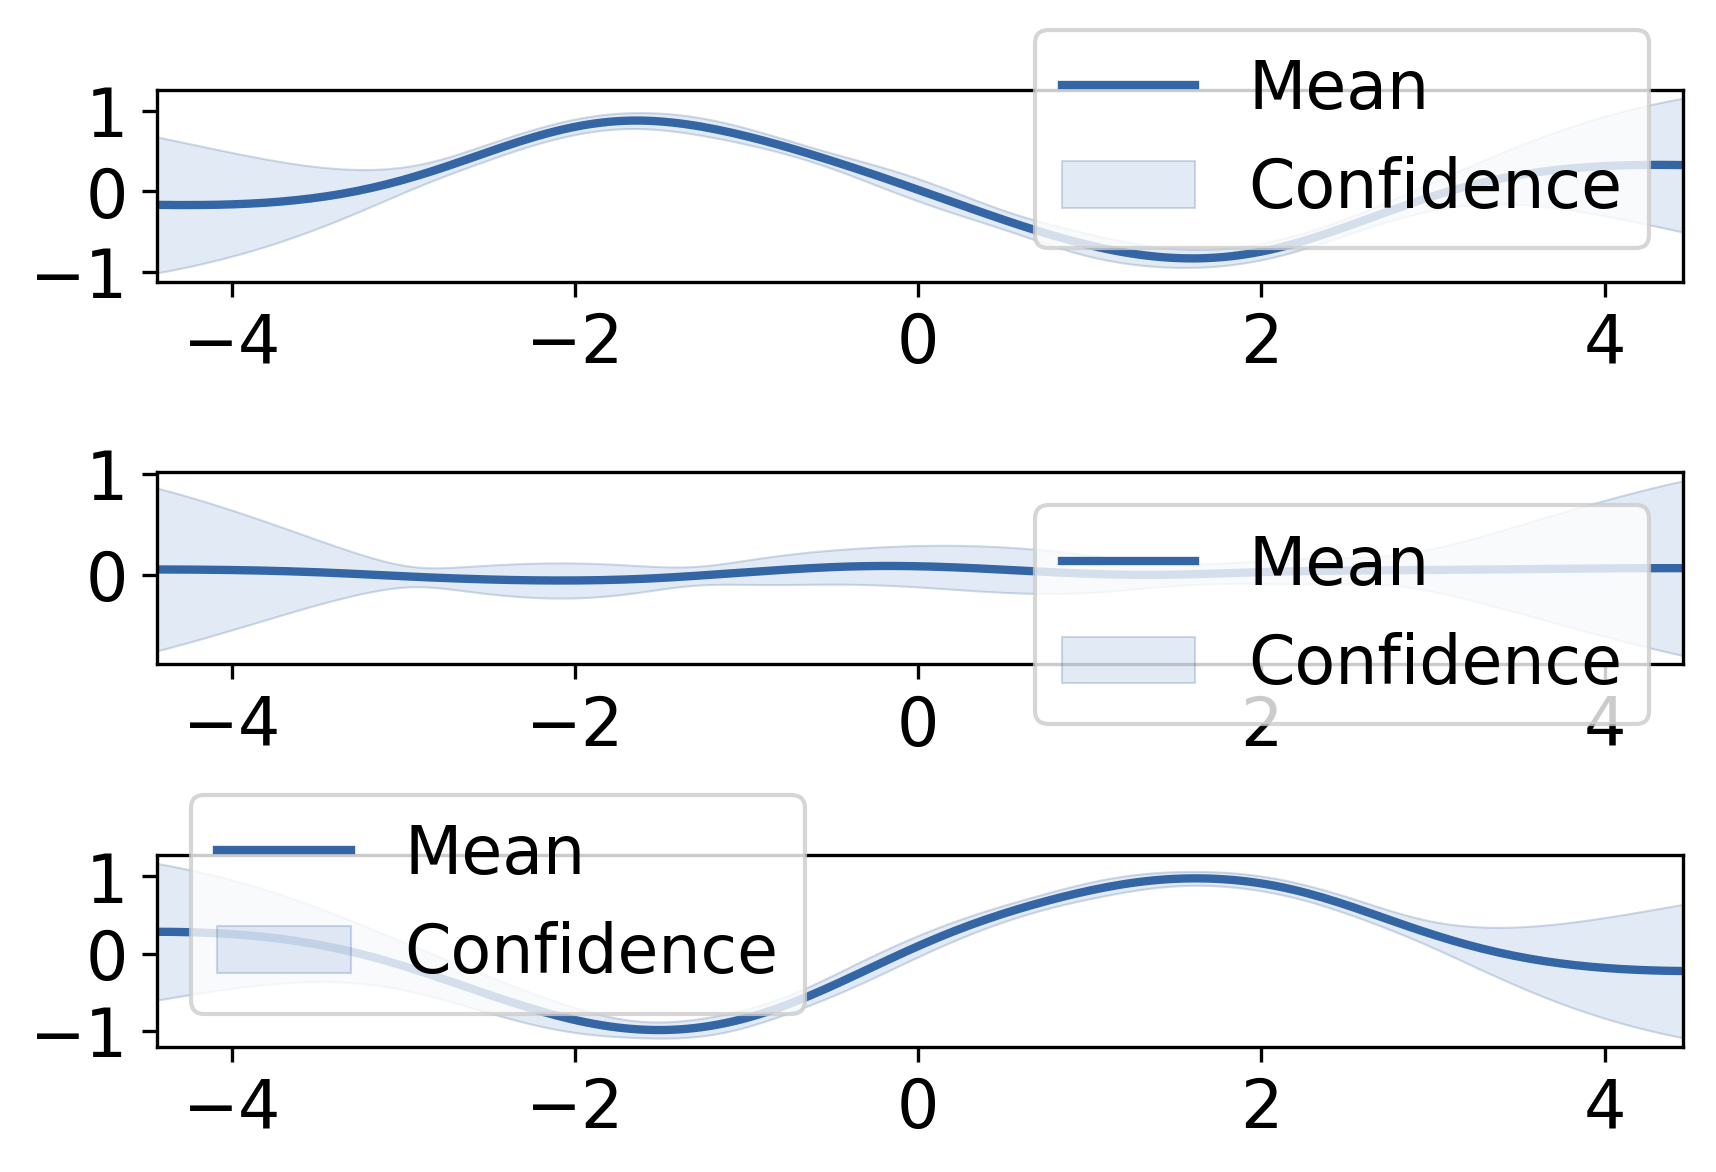

In [30]:
slices = [-1, 0, 1.5]
figure = GPy.plotting.plotting_library().figure(3, 1)
for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(1,y)], row=(i+1), plot_data=False)

For vertical slices, simply fix the other input: `fixed_inputs=[(0,y)]`

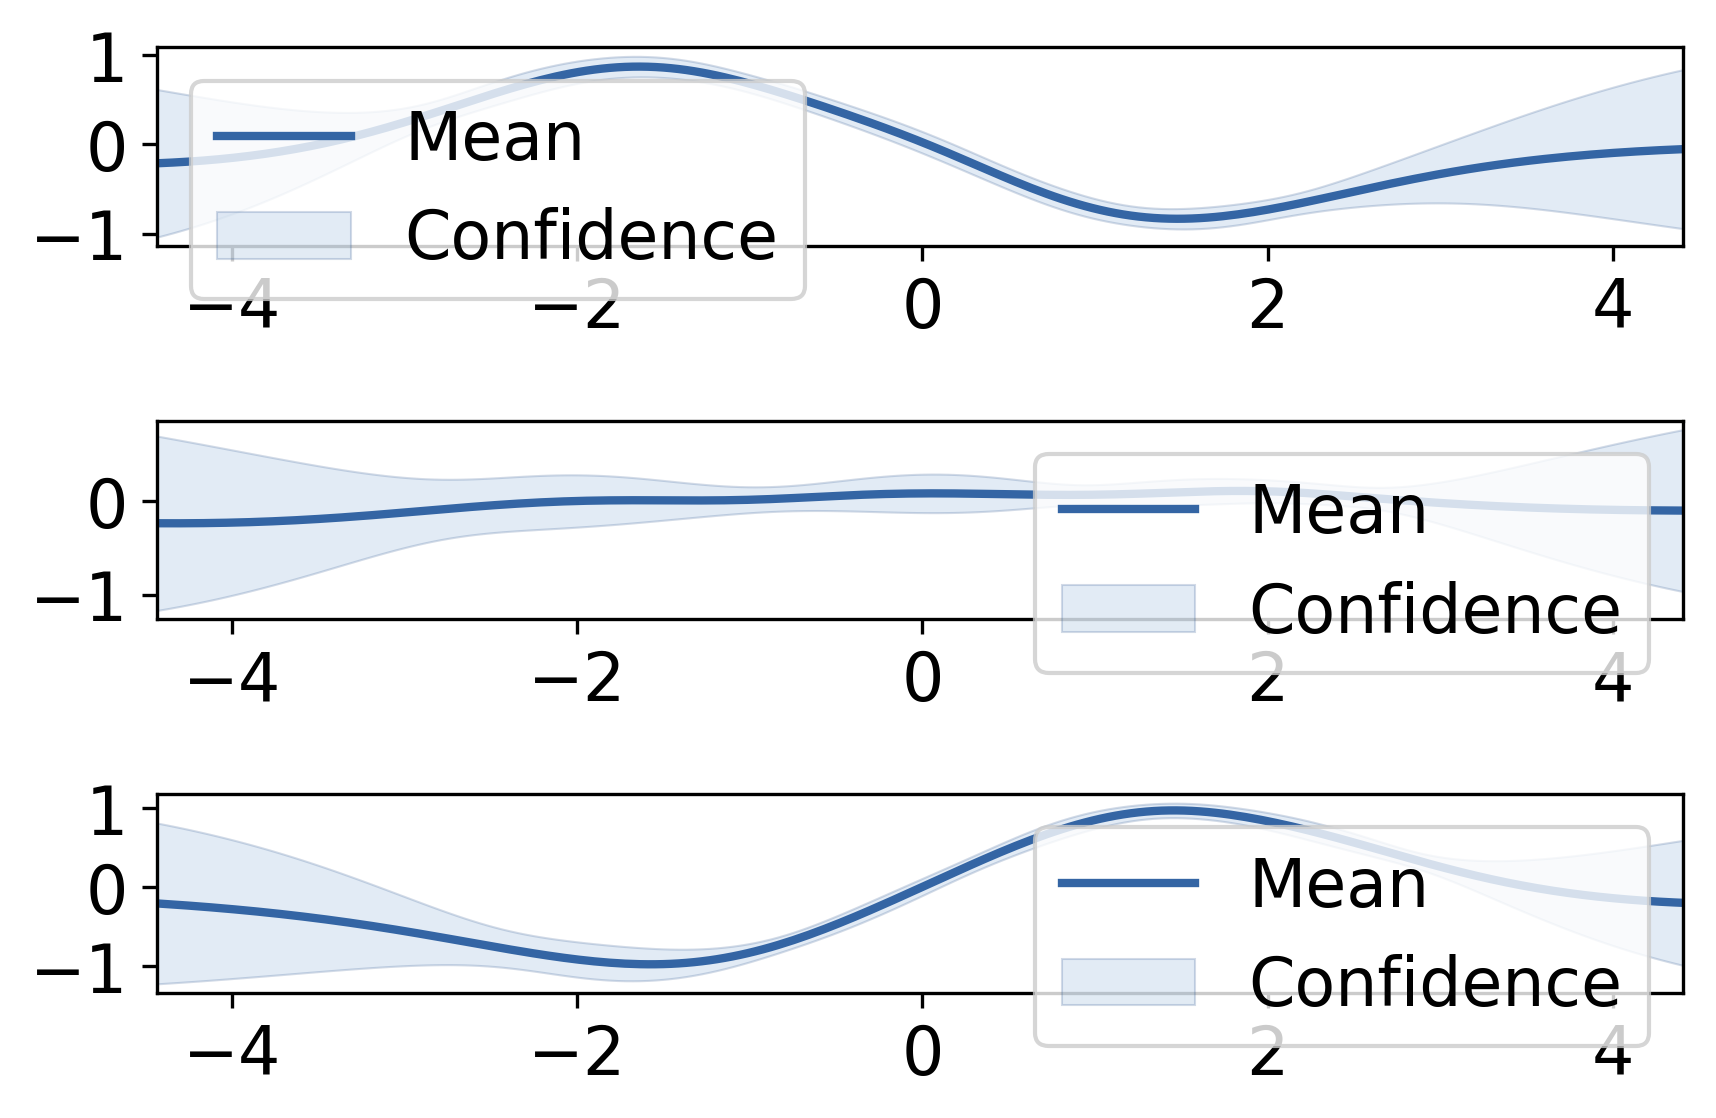

In [31]:
slices = [-1, 0, 1.5]
figure = GPy.plotting.plotting_library().figure(3, 1)
for i, y in zip(range(3), slices):
    canvas = m.plot(figure=figure, fixed_inputs=[(0,y)], row=(i+1), plot_data=False)

## Gaussian Processes with scikit-learn
- `GaussianProcessRegressor`
- Hyperparameters:
    - `kernel`: kernel specifying the covariance function of the GP
        - Default: "1.0 * RBF(1.0)"
        - Typically leave at default. Will be optimized during fitting
    - `alpha`: regularization parameter 
        - Tikhonov regularization of the assumed covariance between the training points.
        - Adds a (small) value to the diagonal of the kernel matrix during fitting. 
        - Larger values:
            - correspond to increased noise level in the observations
            - also reduce potential numerical issues during fitting
        - Default: 1e-10
    - `n_restarts_optimizer`: number of restarts of the optimizer
        - Default: 0. Best to do at least a few iterations.
        - Optimizer finds the kernel’s parameters which maximize the log-marginal likelihood
- Retrieve predictions and confidence interval after fitting:
```
y_pred, sigma = gp.predict(x, return_std=True)
```

Example

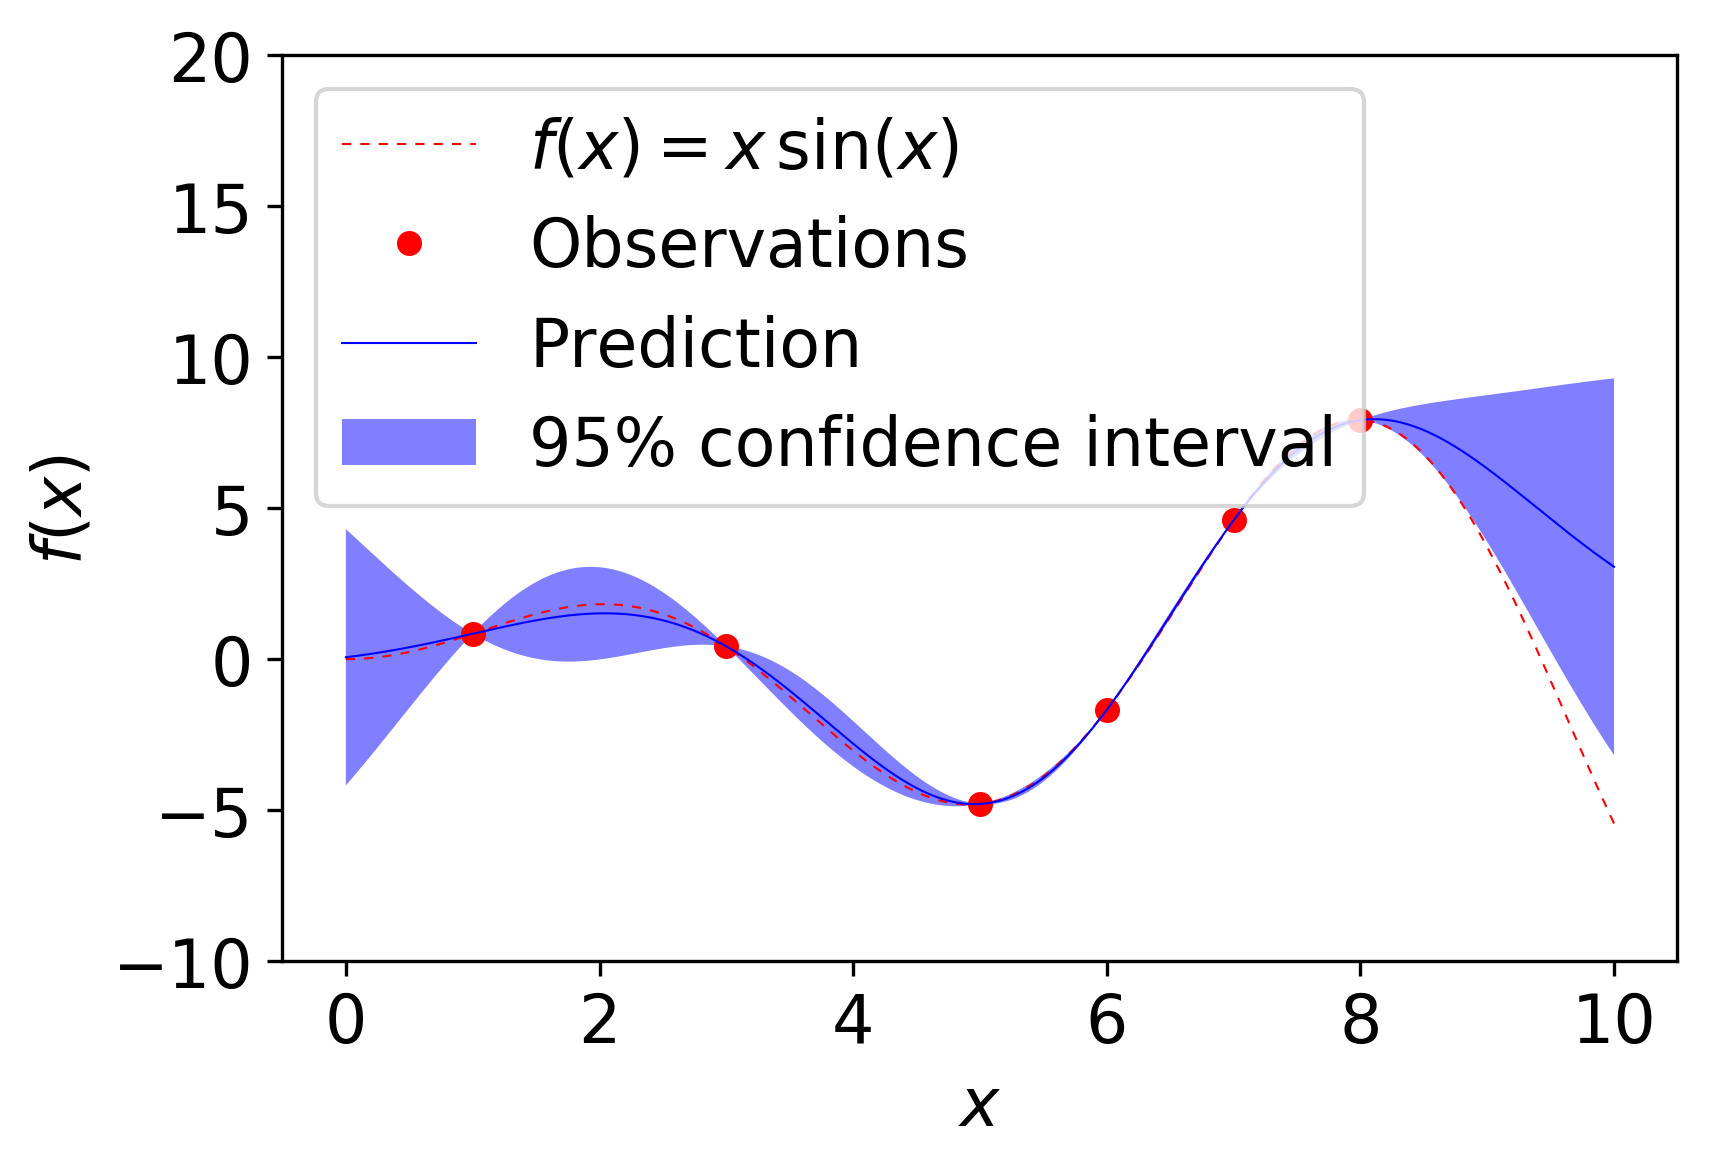

In [32]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

def f(x):
    """The function to predict."""
    return x * np.sin(x)

X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instanciate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

Example with noisy data

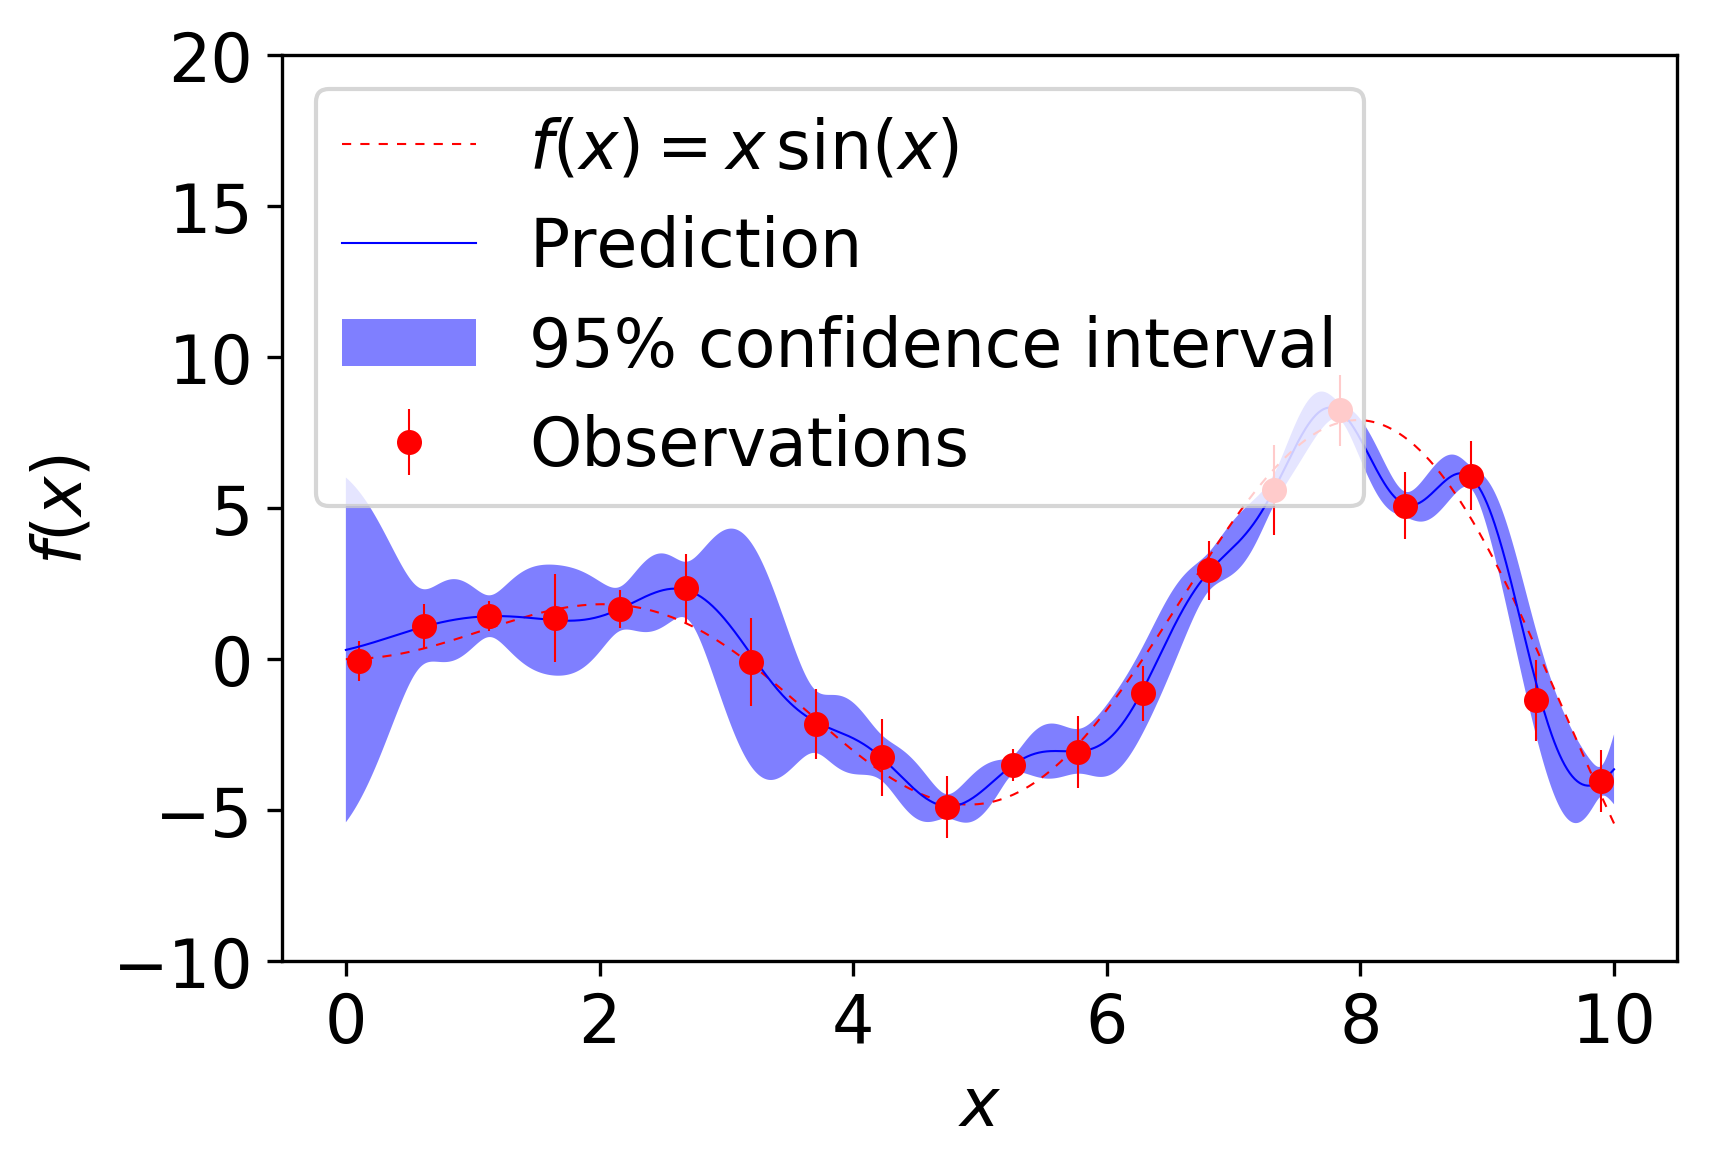

In [33]:
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Instanciate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha=(dy / y) ** 2,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()

# Gaussian processes

The advantages of Gaussian processes are:
- The prediction interpolates the observations (at least for regular kernels).
- The prediction is probabilistic (Gaussian) so that one can compute empirical confidence intervals.
- Versatile: different kernels can be specified.
    
The disadvantages of Gaussian processes include:
- They are not sparse, i.e., they use the whole samples/features information to perform the prediction.
- They lose efficiency in high dimensional spaces – namely when the number of features exceeds a few dozens.

